In [258]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colormaps

In [259]:
from function_def import replace_outliers_with_median, replace_outliers_with_mean, remove_outliers,new_quality_value, classificator, plot_boxplots, plot_boxplots_comparision, plot_bar_chart_df, plot_result, classificator_evo, classification_evo, plot_result_evo, plot_bar_chart_df_evo, trova_max

In [260]:
wine_dataframe = pd.read_csv('restore_winedata.csv')
result={}
data=wine_dataframe.copy()
data.shape

(1599, 12)

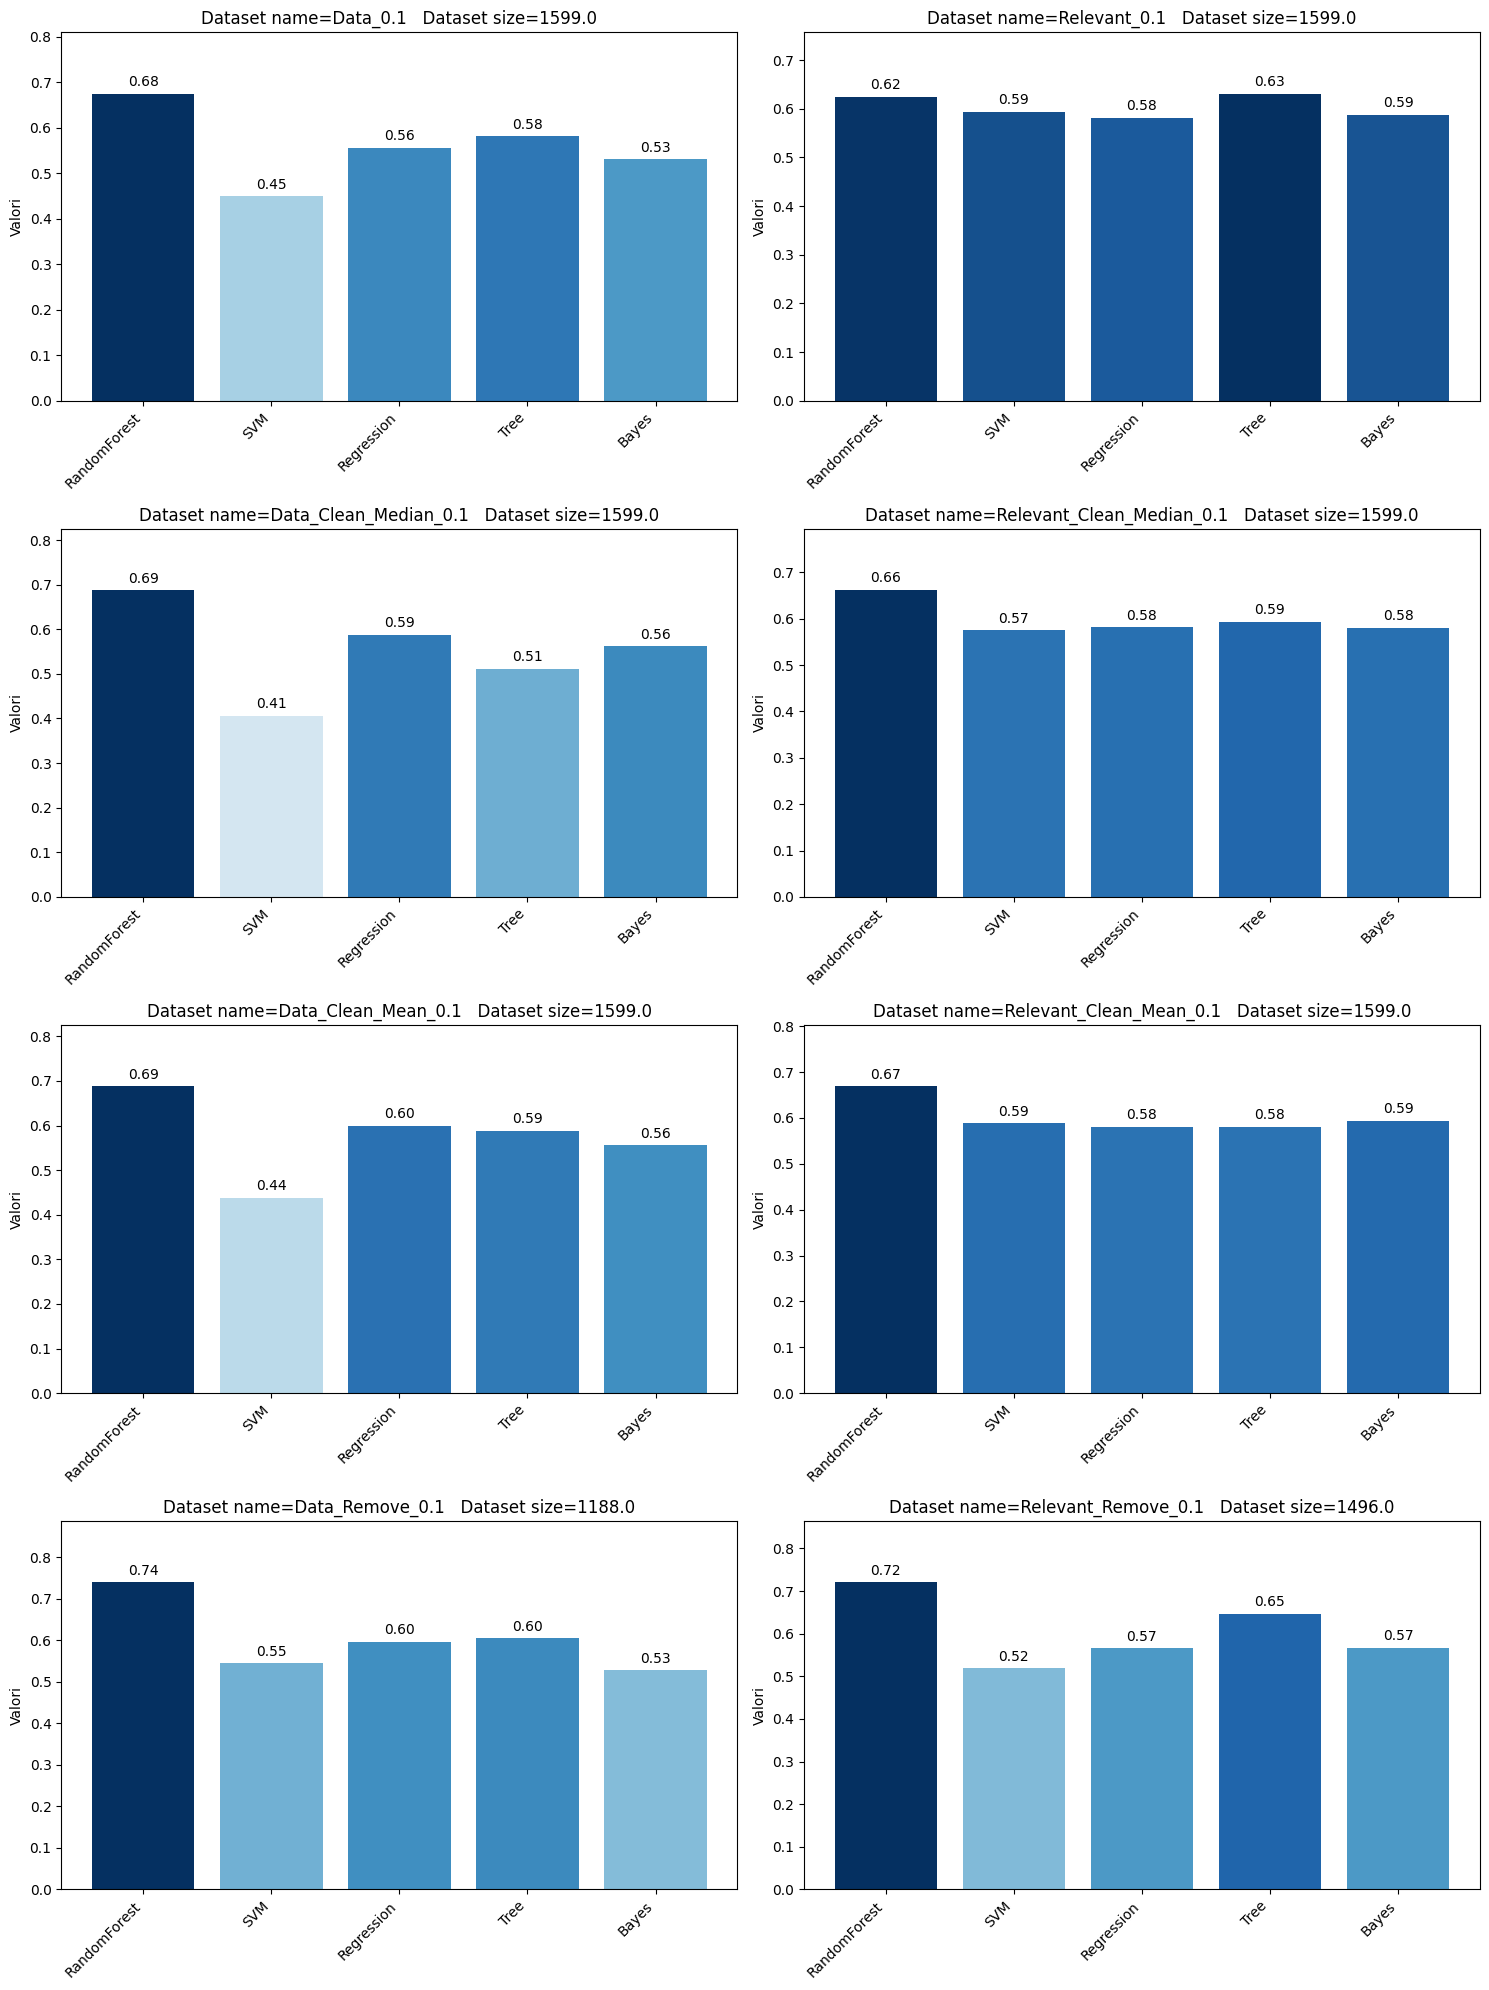

In [261]:
result['r_10']=classification_evo(data,0.10)
plot_result_evo(result['r_10'])

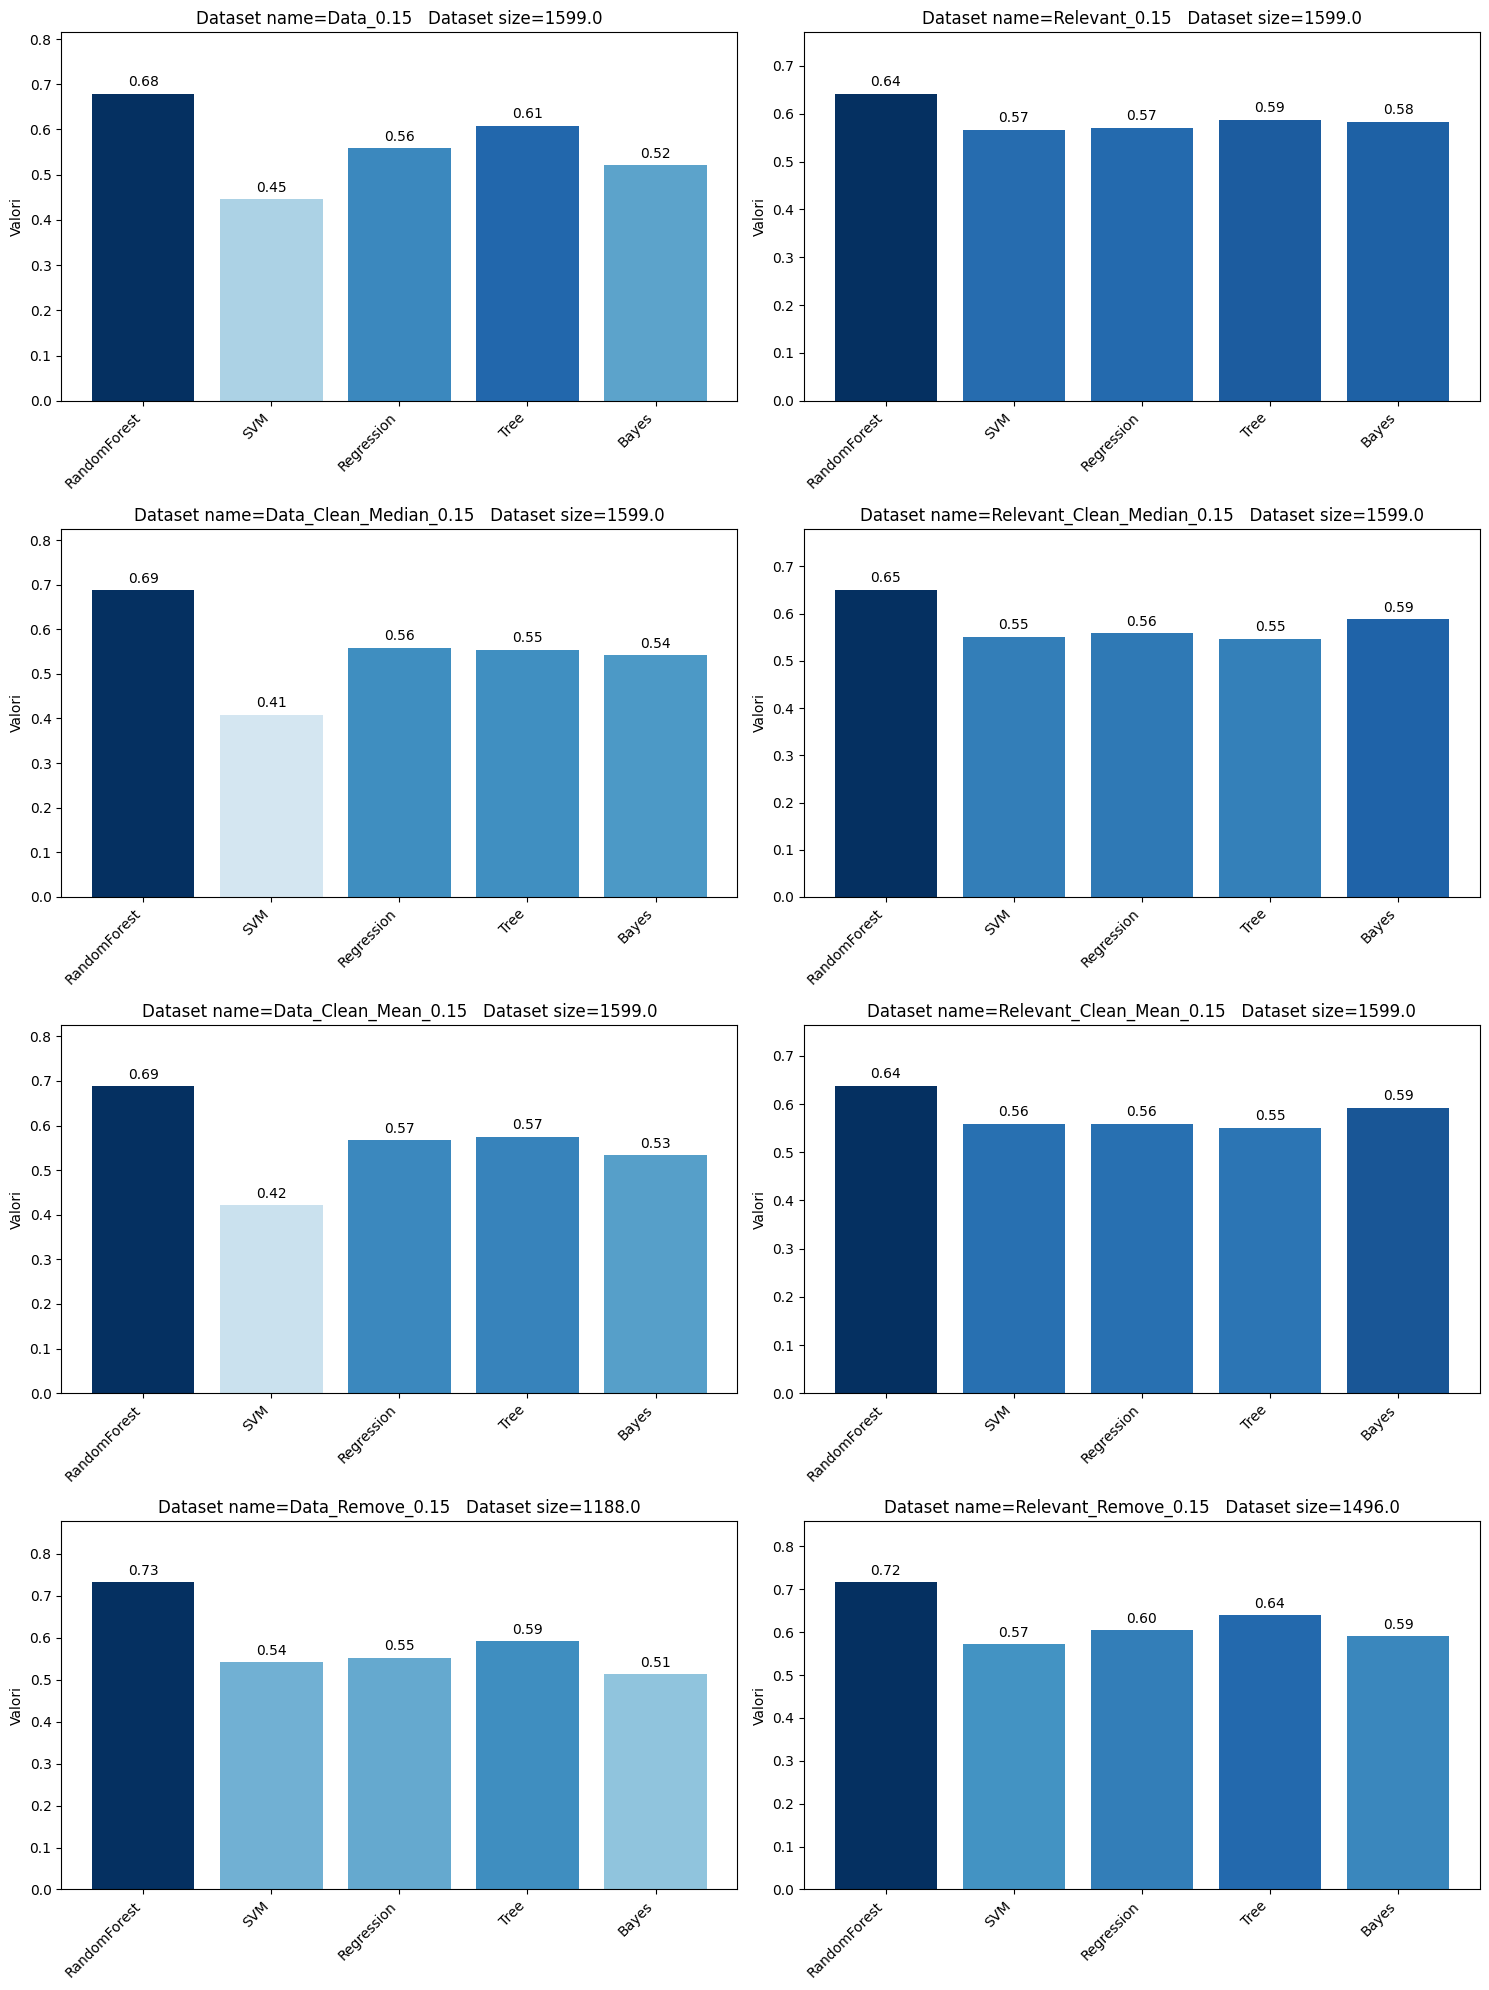

In [262]:
result['r_15']=classification_evo(data,0.15)
plot_result_evo(result['r_15'])

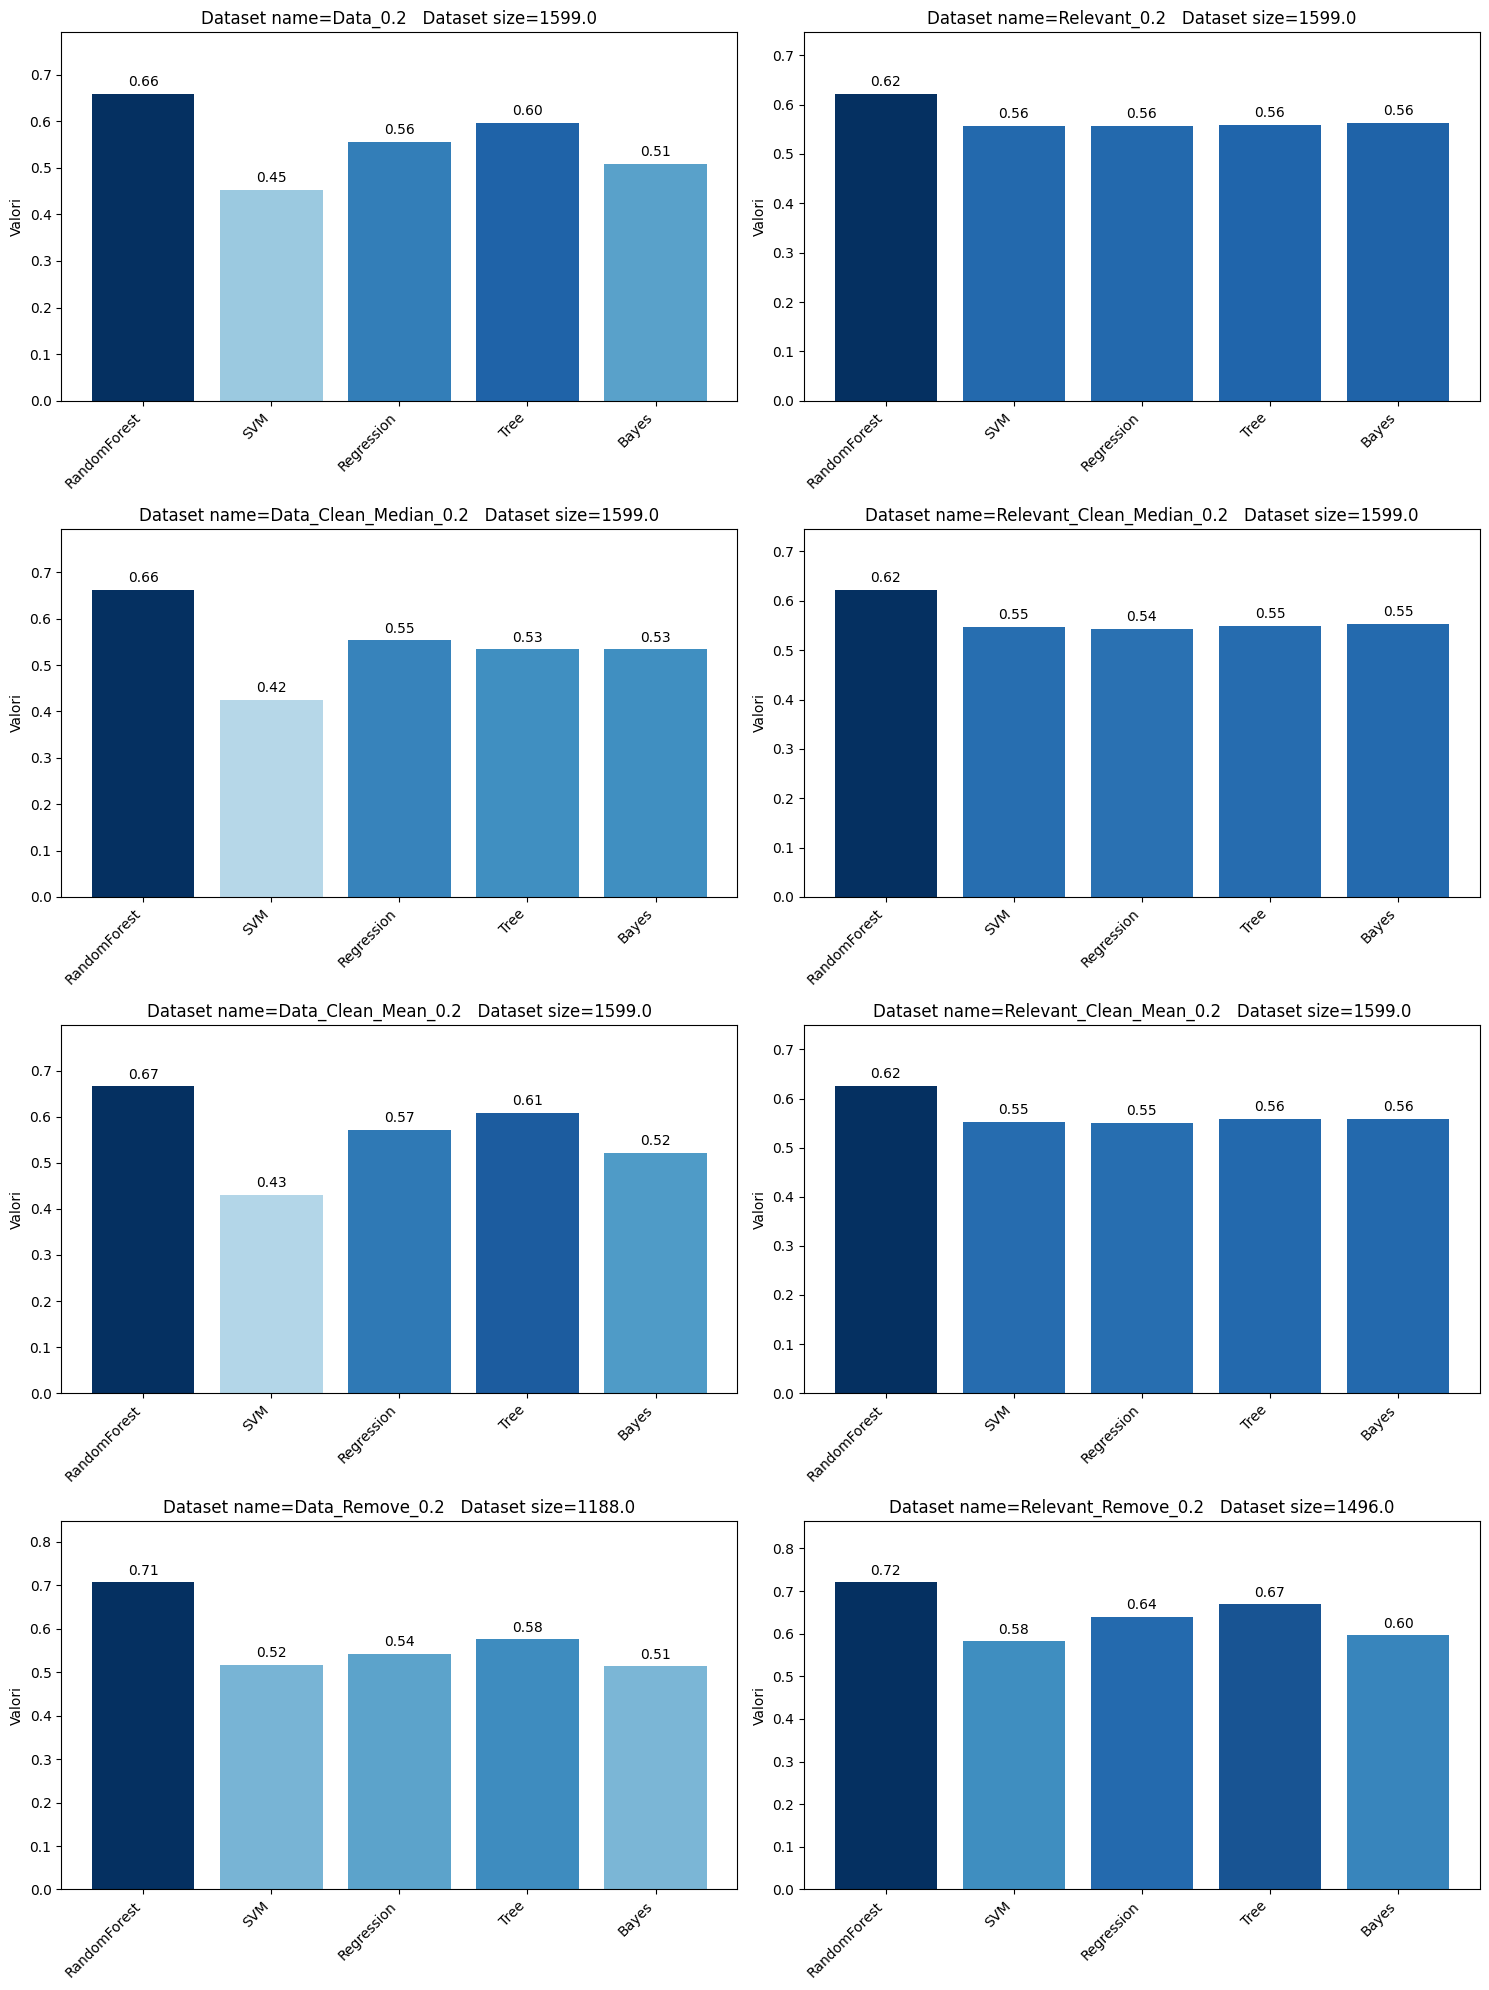

In [175]:
result['r_20']=classification_evo(data,0.20)
plot_result_evo(result['r_20'])

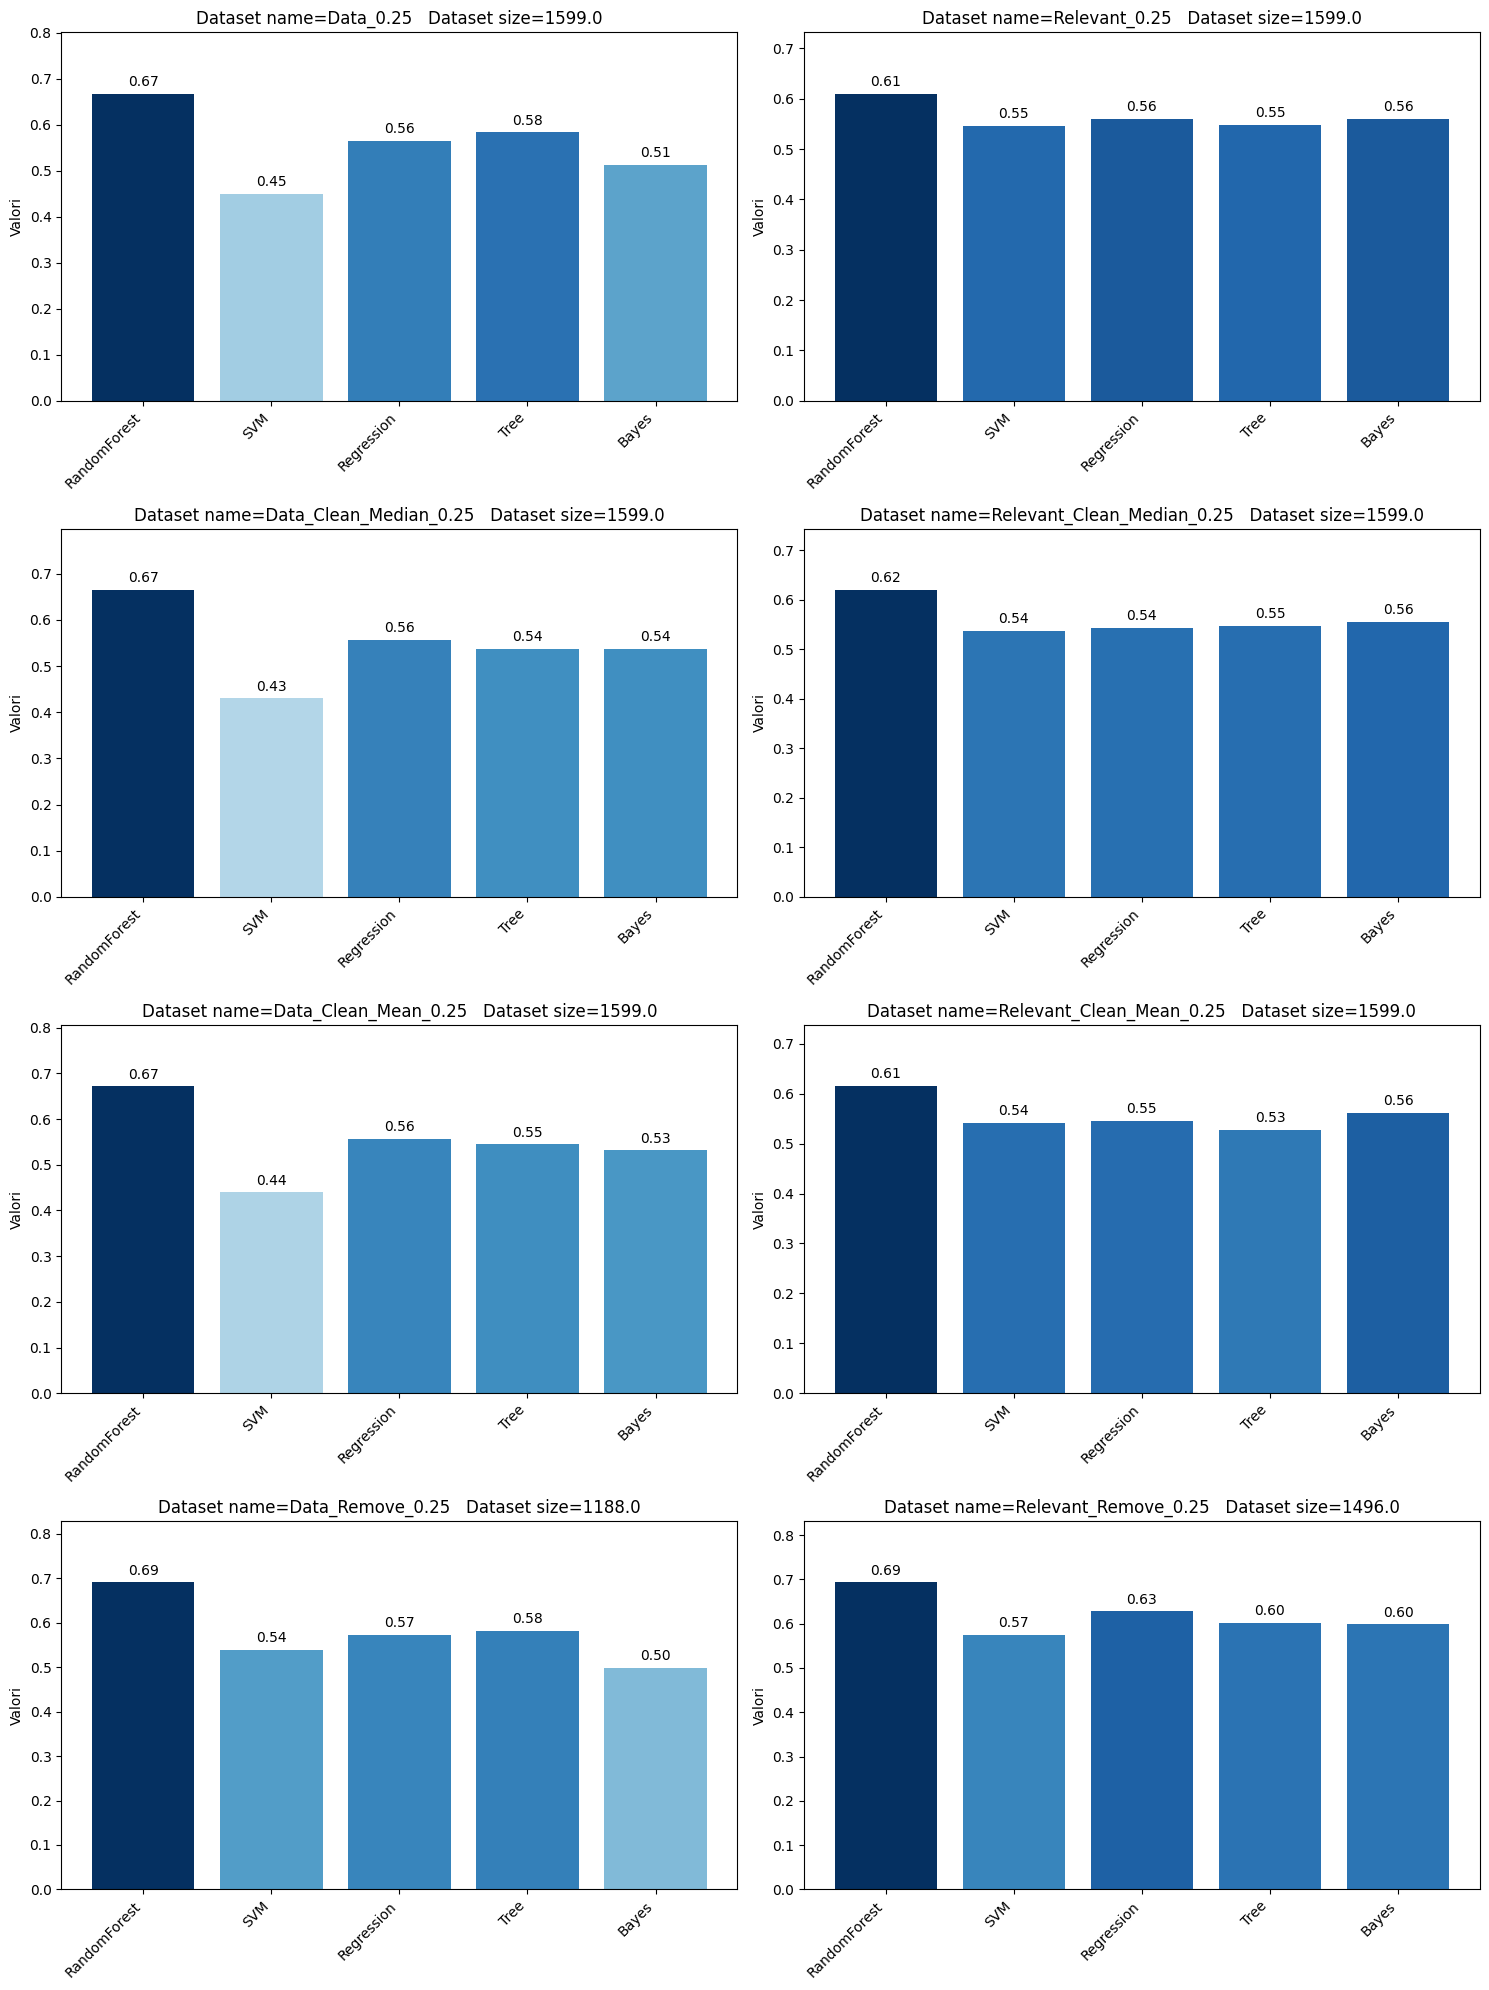

In [176]:
result['r_25']=classification_evo(data,0.25)
plot_result_evo(result['r_25'])

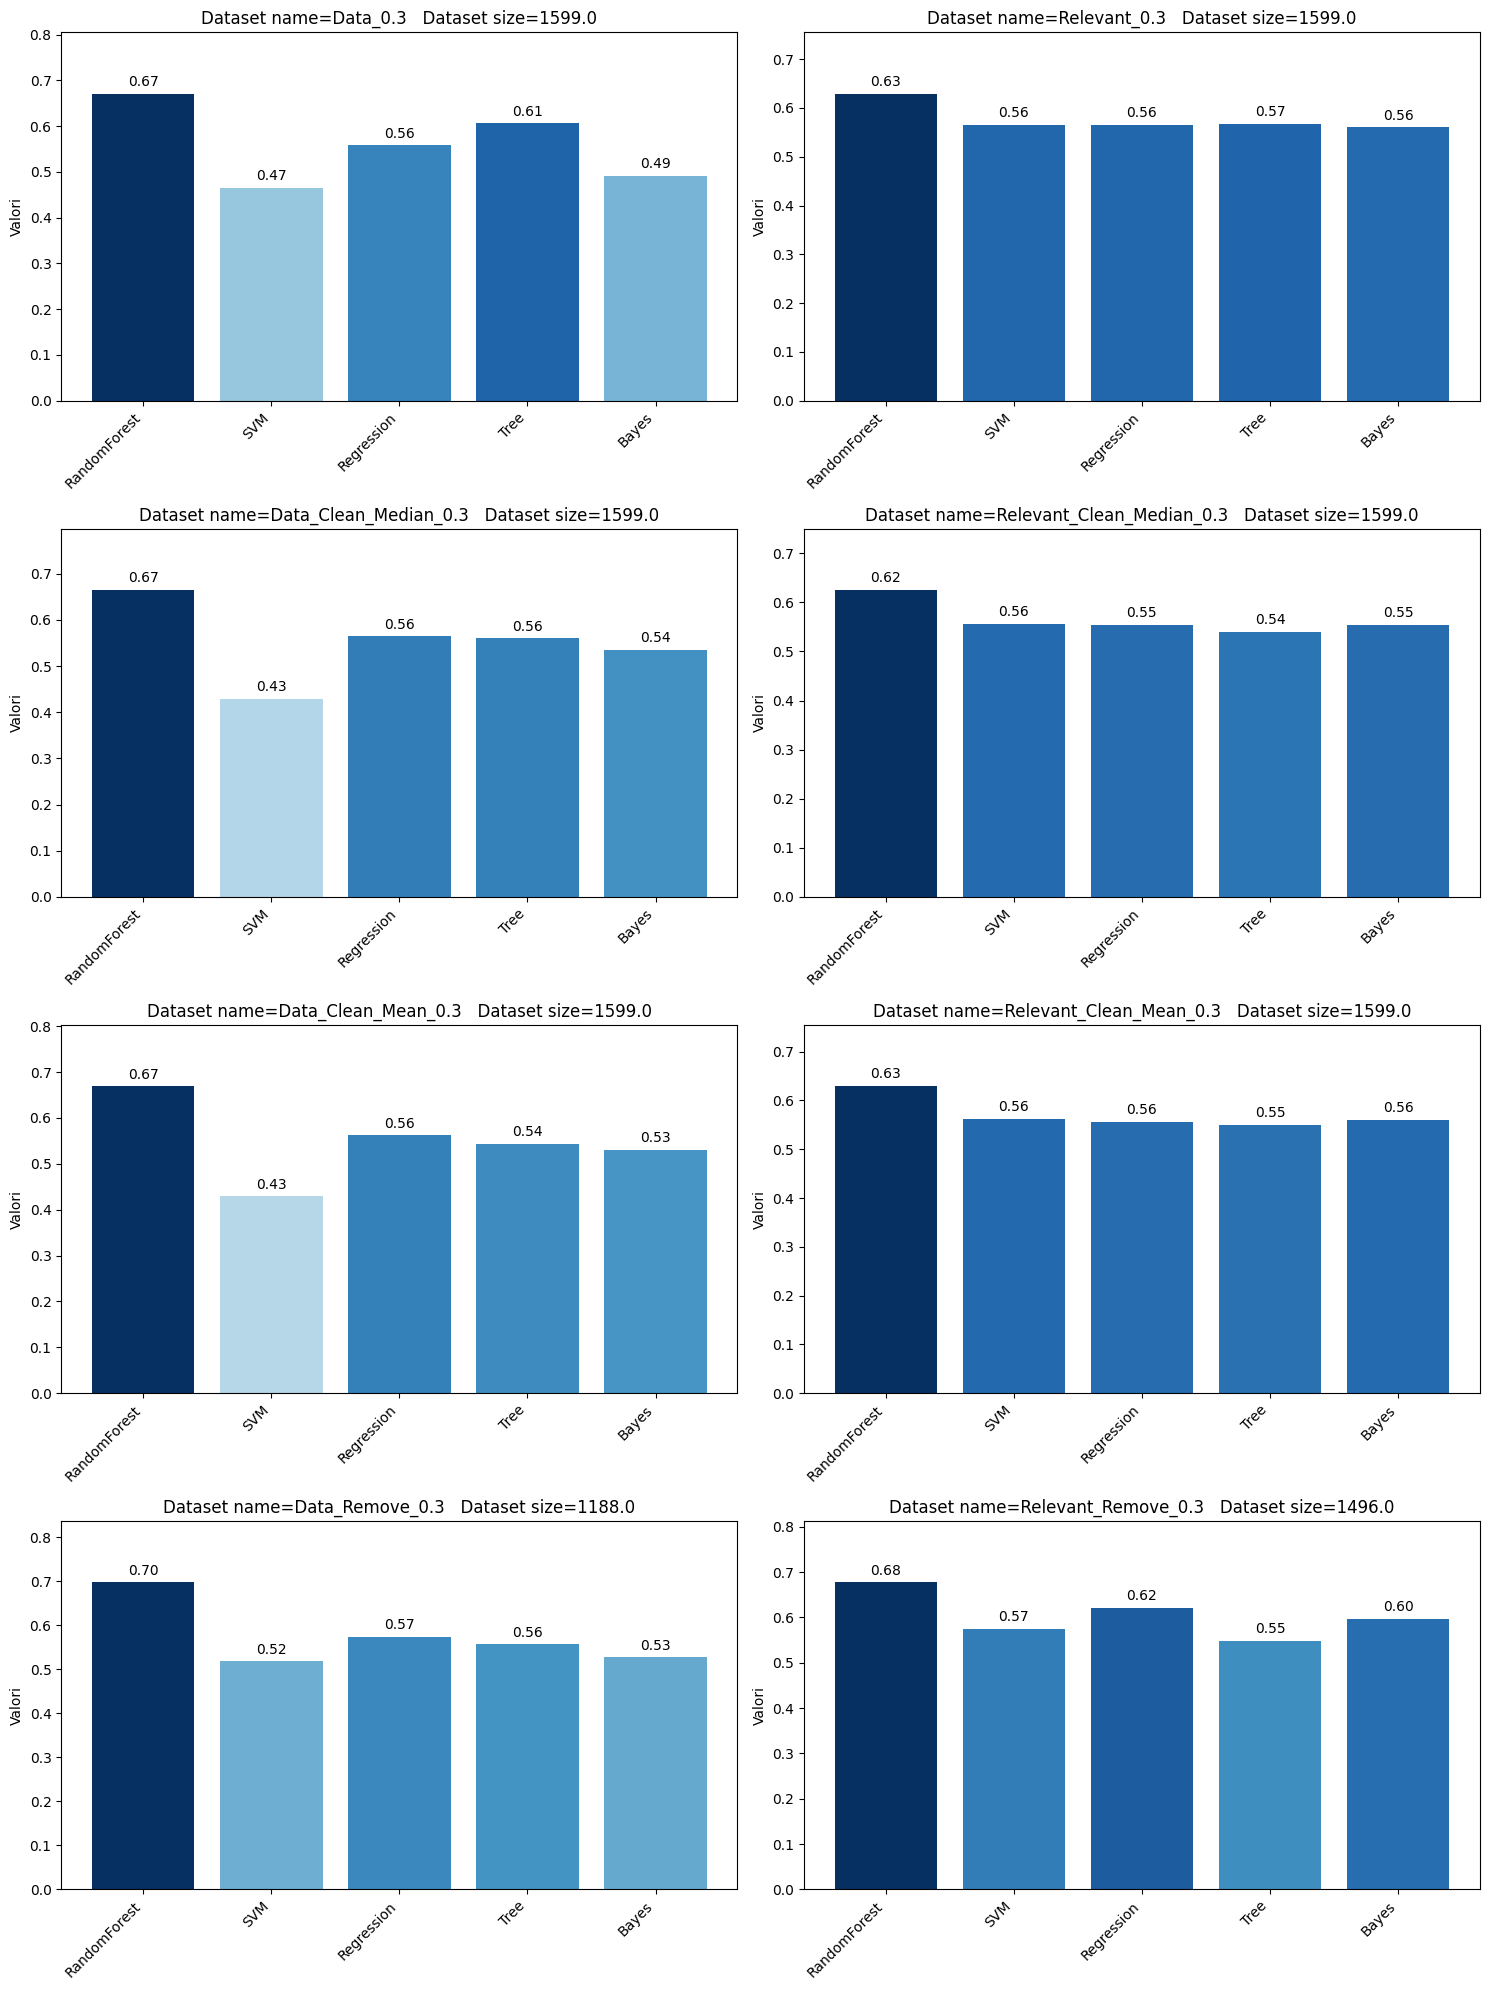

In [177]:
result['r_30']=classification_evo(data,0.30)
plot_result_evo(result['r_30'])

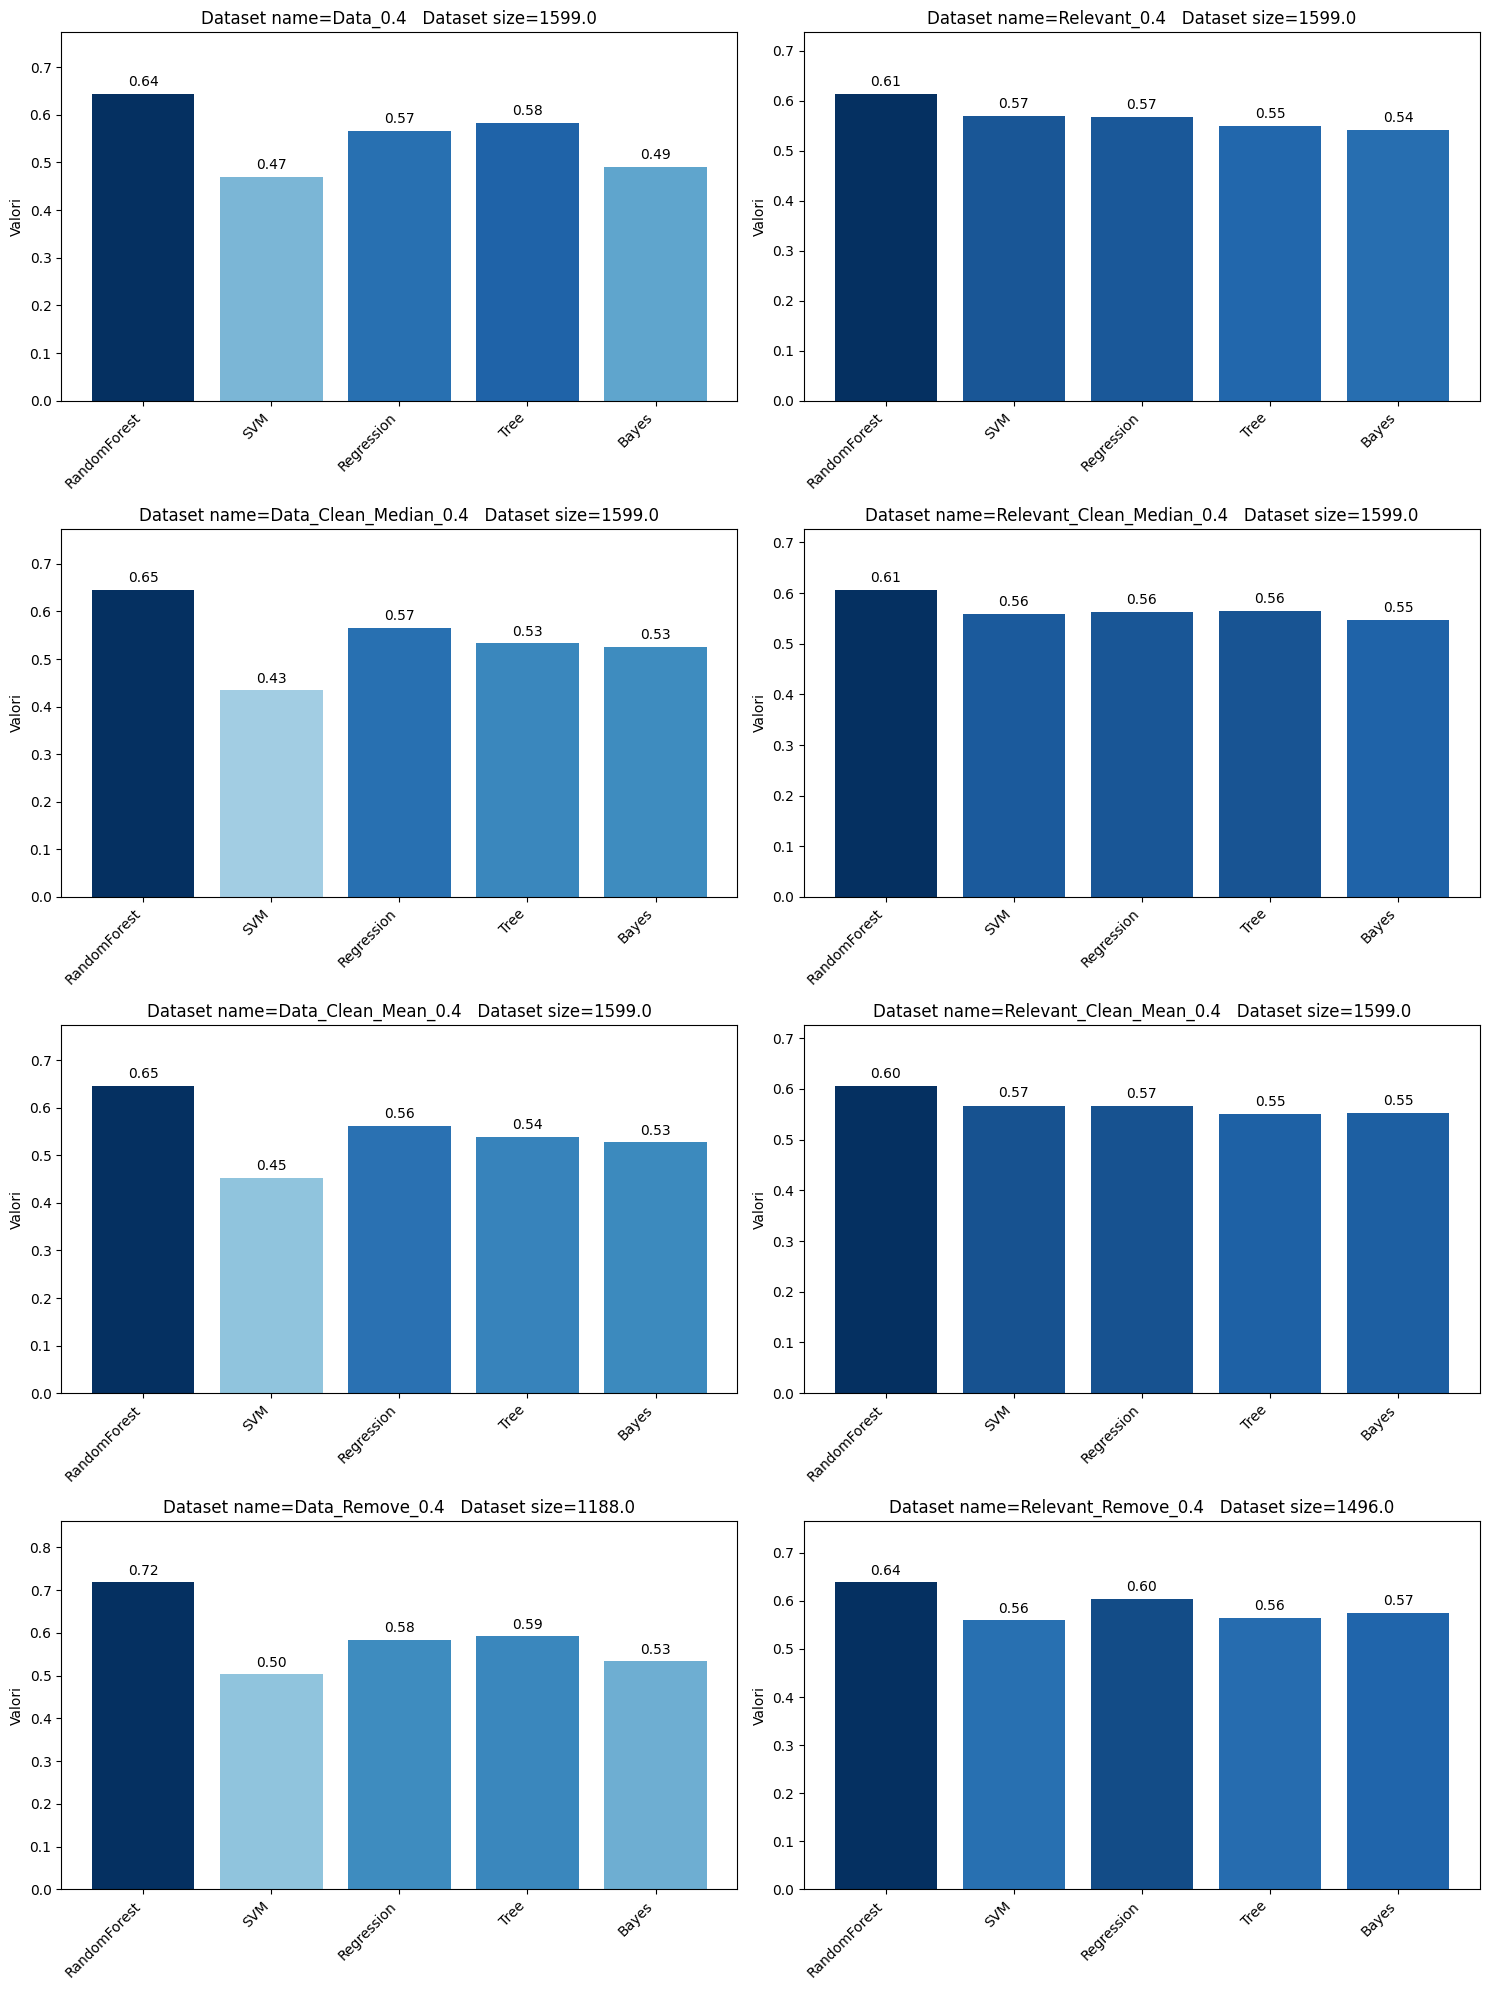

In [178]:
result['r_40']=classification_evo(data,0.40)
plot_result_evo(result['r_40'])

In [201]:
merged_df = pd.concat([result['r_10'], result['r_15'], result['r_20'],
                      result['r_25'], result['r_30'], result['r_40']],
                      axis=1)
merged_df

,Data_0.1,Relevant_0.1,Data_Clean_Median_0.1,Relevant_Clean_Median_0.1,Data_Clean_Mean_0.1,Relevant_Clean_Mean_0.1,Data_Remove_0.1,Relevant_Remove_0.1,Data_0.15,Relevant_0.15,...,Data_Remove_0.3,Relevant_Remove_0.3,Data_0.4,Relevant_0.4,Data_Clean_Median_0.4,Relevant_Clean_Median_0.4,Data_Clean_Mean_0.4,Relevant_Clean_Mean_0.4,Data_Remove_0.4,Relevant_Remove_0.4
Size,1599.00000,1599.00000,1599.0000,1599.00000,1599.000,1599.00000,1188.000000,1496.000000,1599.000000,1599.000000,...,1188.00000,1496.000000,1599.000000,1599.000000,1599.000000,1599.0000,1599.0000,1599.000000,1188.000000,1496.000000
RandomForest,0.67500,0.62500,0.6880,0.66200,0.688,0.66900,0.739000,0.720000,0.679000,0.642000,...,0.69700,0.677000,0.644000,0.614000,0.645000,0.6060,0.6450,0.605000,0.718000,0.638000
SVM,0.45000,0.59400,0.4060,0.57500,0.438,0.58800,0.546000,0.520000,0.446000,0.567000,...,0.51800,0.575000,0.470000,0.570000,0.434000,0.5580,0.4520,0.567000,0.504000,0.559000
Regression,0.55625,0.58125,0.5875,0.58125,0.600,0.58125,0.596639,0.566667,0.558333,0.570833,...,0.57423,0.621381,0.565625,0.567187,0.565625,0.5625,0.5625,0.565625,0.584034,0.604341
Tree,0.58100,0.63100,0.5120,0.59400,0.588,0.58100,0.605000,0.647000,0.608000,0.588000,...,0.55700,0.548000,0.583000,0.550000,0.533000,0.5640,0.5390,0.550000,0.592000,0.564000
Bayes,0.53100,0.58800,0.5620,0.58100,0.556,0.59400,0.529000,0.567000,0.521000,0.583000,...,0.52700,0.597000,0.491000,0.542000,0.525000,0.5470,0.5270,0.552000,0.534000,0.574000


In [180]:
d_1599 = merged_df.loc[:, (merged_df == 1599).any()]
df_1599=d_1599.drop(index=['Size'])
df_1599

,Data_0.1,Relevant_0.1,Data_Clean_Median_0.1,Relevant_Clean_Median_0.1,Data_Clean_Mean_0.1,Relevant_Clean_Mean_0.1,Data_0.15,Relevant_0.15,Data_Clean_Median_0.15,Relevant_Clean_Median_0.15,...,Data_Clean_Median_0.3,Relevant_Clean_Median_0.3,Data_Clean_Mean_0.3,Relevant_Clean_Mean_0.3,Data_0.4,Relevant_0.4,Data_Clean_Median_0.4,Relevant_Clean_Median_0.4,Data_Clean_Mean_0.4,Relevant_Clean_Mean_0.4
RandomForest,0.67500,0.62500,0.6880,0.66200,0.688,0.66900,0.679000,0.642000,0.688000,0.650000,...,0.665000,0.625000,0.6690,0.62900,0.644000,0.614000,0.645000,0.6060,0.6450,0.605000
SVM,0.45000,0.59400,0.4060,0.57500,0.438,0.58800,0.446000,0.567000,0.408000,0.550000,...,0.429000,0.556000,0.4290,0.56200,0.470000,0.570000,0.434000,0.5580,0.4520,0.567000
Regression,0.55625,0.58125,0.5875,0.58125,0.600,0.58125,0.558333,0.570833,0.558333,0.558333,...,0.564583,0.554167,0.5625,0.55625,0.565625,0.567187,0.565625,0.5625,0.5625,0.565625
Tree,0.58100,0.63100,0.5120,0.59400,0.588,0.58100,0.608000,0.588000,0.554000,0.546000,...,0.560000,0.540000,0.5440,0.55000,0.583000,0.550000,0.533000,0.5640,0.5390,0.550000
Bayes,0.53100,0.58800,0.5620,0.58100,0.556,0.59400,0.521000,0.583000,0.542000,0.588000,...,0.535000,0.554000,0.5310,0.56000,0.491000,0.542000,0.525000,0.5470,0.5270,0.552000


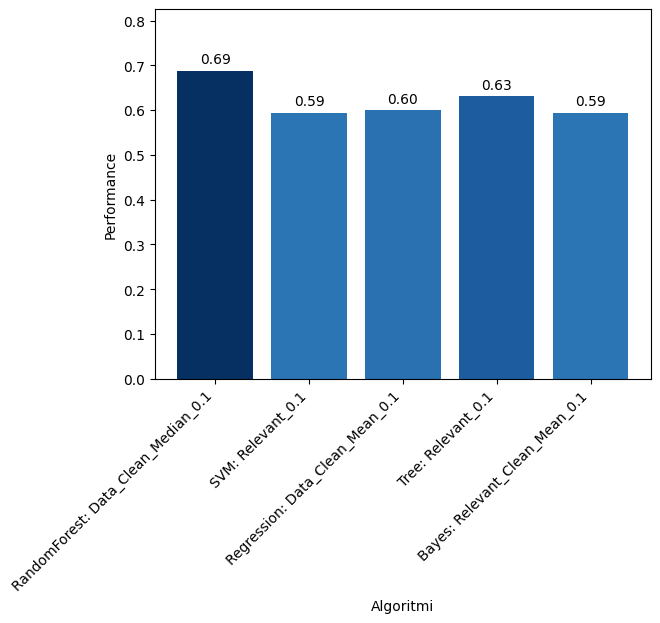

In [181]:
max_1599=trova_max(df_1599)
plot_bar_chart_df_evo(max_1599)

In [182]:
d_1496 = merged_df.loc[:, (merged_df == 1496).any()]
df_1496=d_1496.drop(index=['Size'])
df_1496

,Relevant_Remove_0.1,Relevant_Remove_0.15,Relevant_Remove_0.2,Relevant_Remove_0.25,Relevant_Remove_0.3,Relevant_Remove_0.4
RandomForest,0.720000,0.716000,0.720,0.693000,0.677000,0.638000
SVM,0.520000,0.573000,0.583,0.575000,0.575000,0.559000
Regression,0.566667,0.604444,0.640,0.628342,0.621381,0.604341
Tree,0.647000,0.640000,0.670,0.602000,0.548000,0.564000
Bayes,0.567000,0.591000,0.597,0.599000,0.597000,0.574000


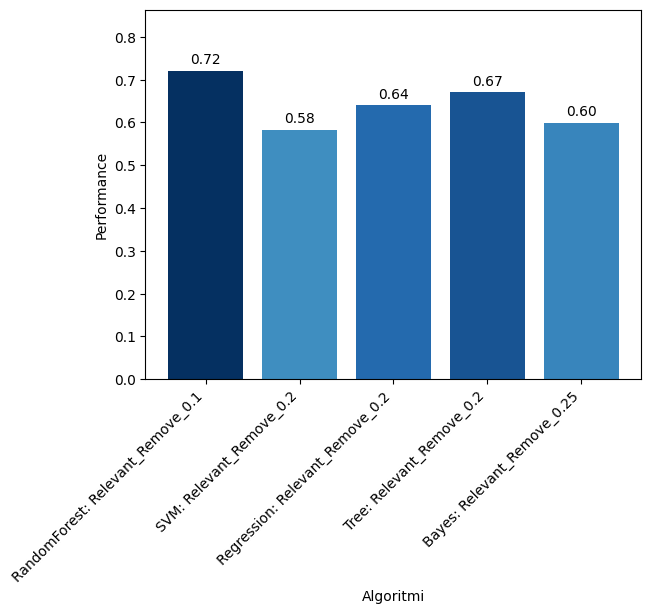

In [183]:
max_1496=trova_max(df_1496)
plot_bar_chart_df_evo(max_1496)

In [184]:
d_1188 = merged_df.loc[:, (merged_df == 1188).any()]
df_1188=d_1188.drop(index=['Size'])
df_1188

,Data_Remove_0.1,Data_Remove_0.15,Data_Remove_0.2,Data_Remove_0.25,Data_Remove_0.3,Data_Remove_0.4
RandomForest,0.739000,0.732000,0.706000,0.690000,0.69700,0.718000
SVM,0.546000,0.542000,0.517000,0.539000,0.51800,0.504000
Regression,0.596639,0.553073,0.542017,0.572391,0.57423,0.584034
Tree,0.605000,0.592000,0.576000,0.582000,0.55700,0.592000
Bayes,0.529000,0.514000,0.513000,0.498000,0.52700,0.534000


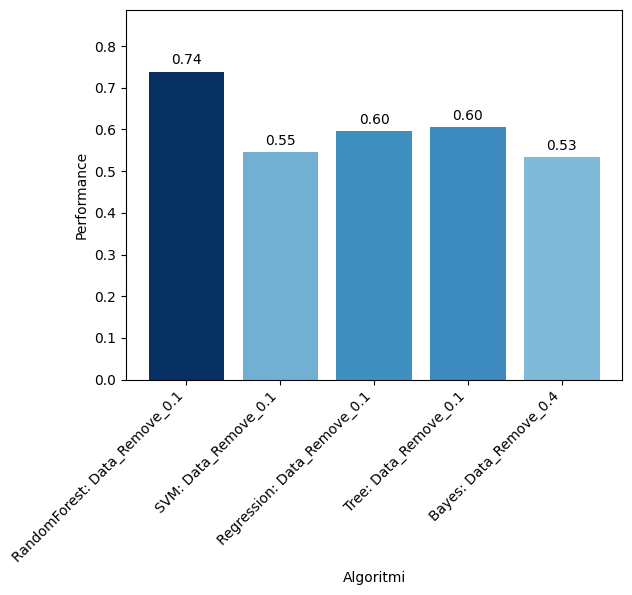

In [185]:
max_1188=trova_max(df_1188)
plot_bar_chart_df_evo(max_1188)

## Reduce of quality Feature

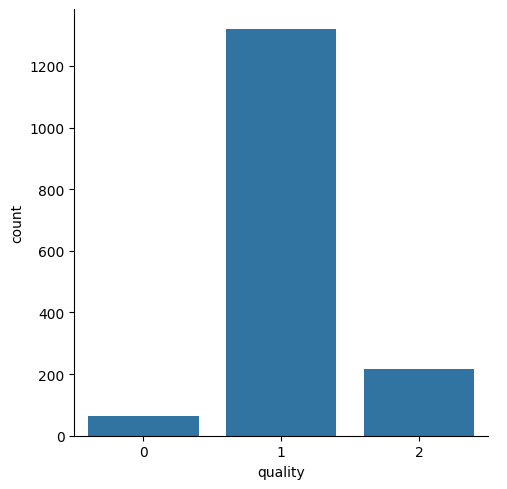

In [186]:
new_data=new_quality_value(data)
new_result={}
sns.catplot(x='quality',data=new_data, kind='count')  #counting and rappresenting different label
plt.show()

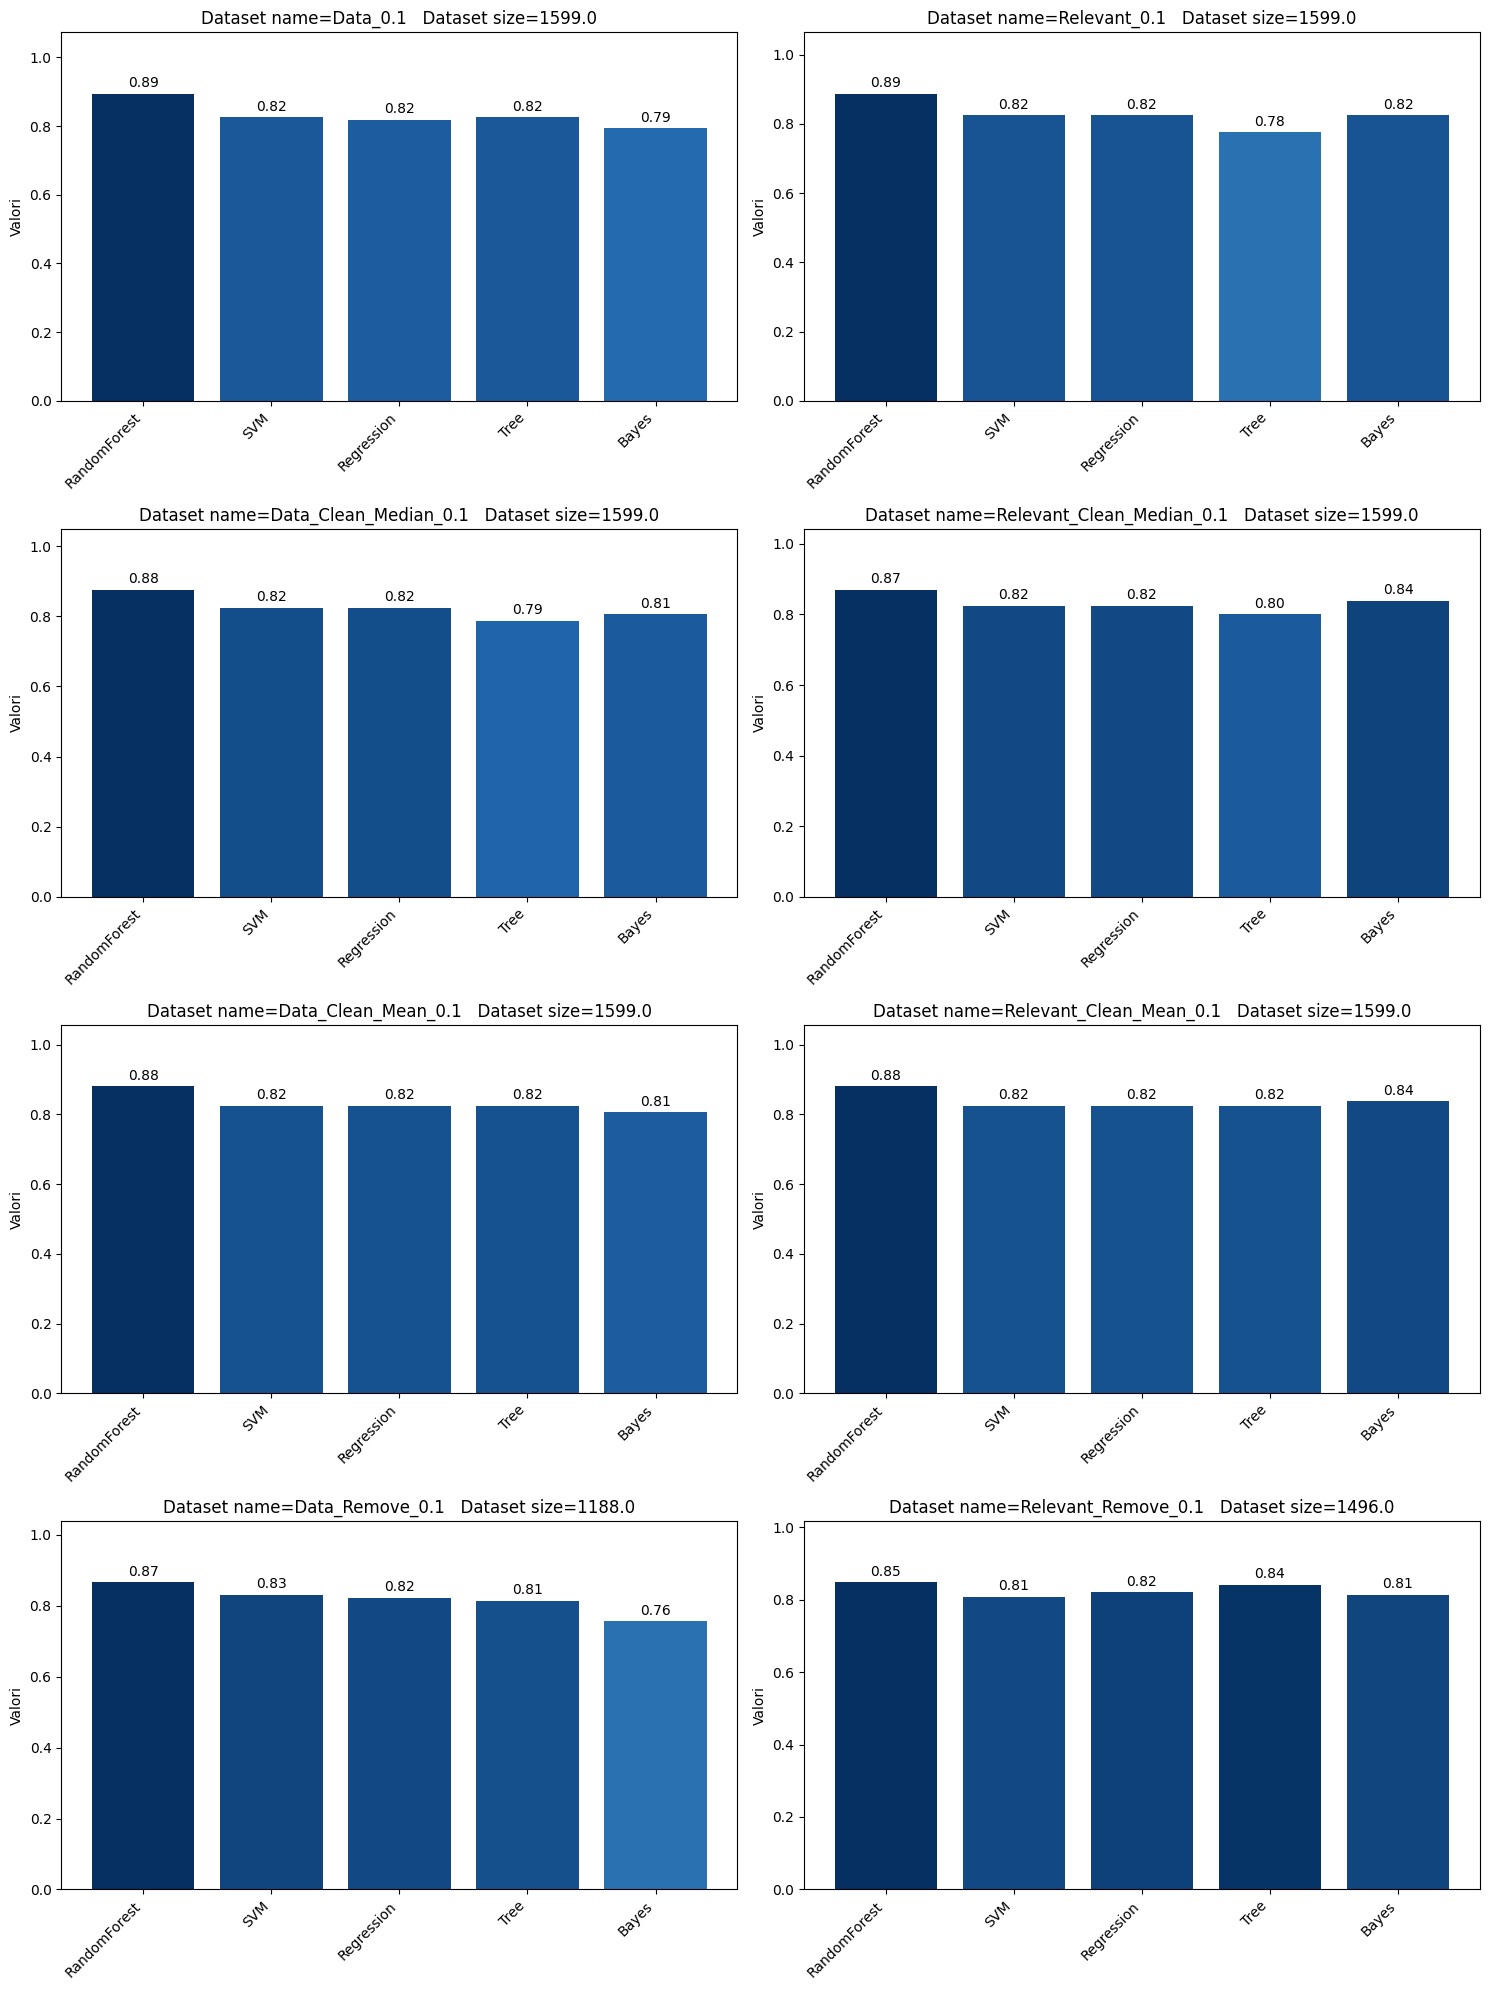

In [187]:
new_result['n_10']=classification_evo(new_data,0.10)
plot_result_evo(new_result['n_10'])

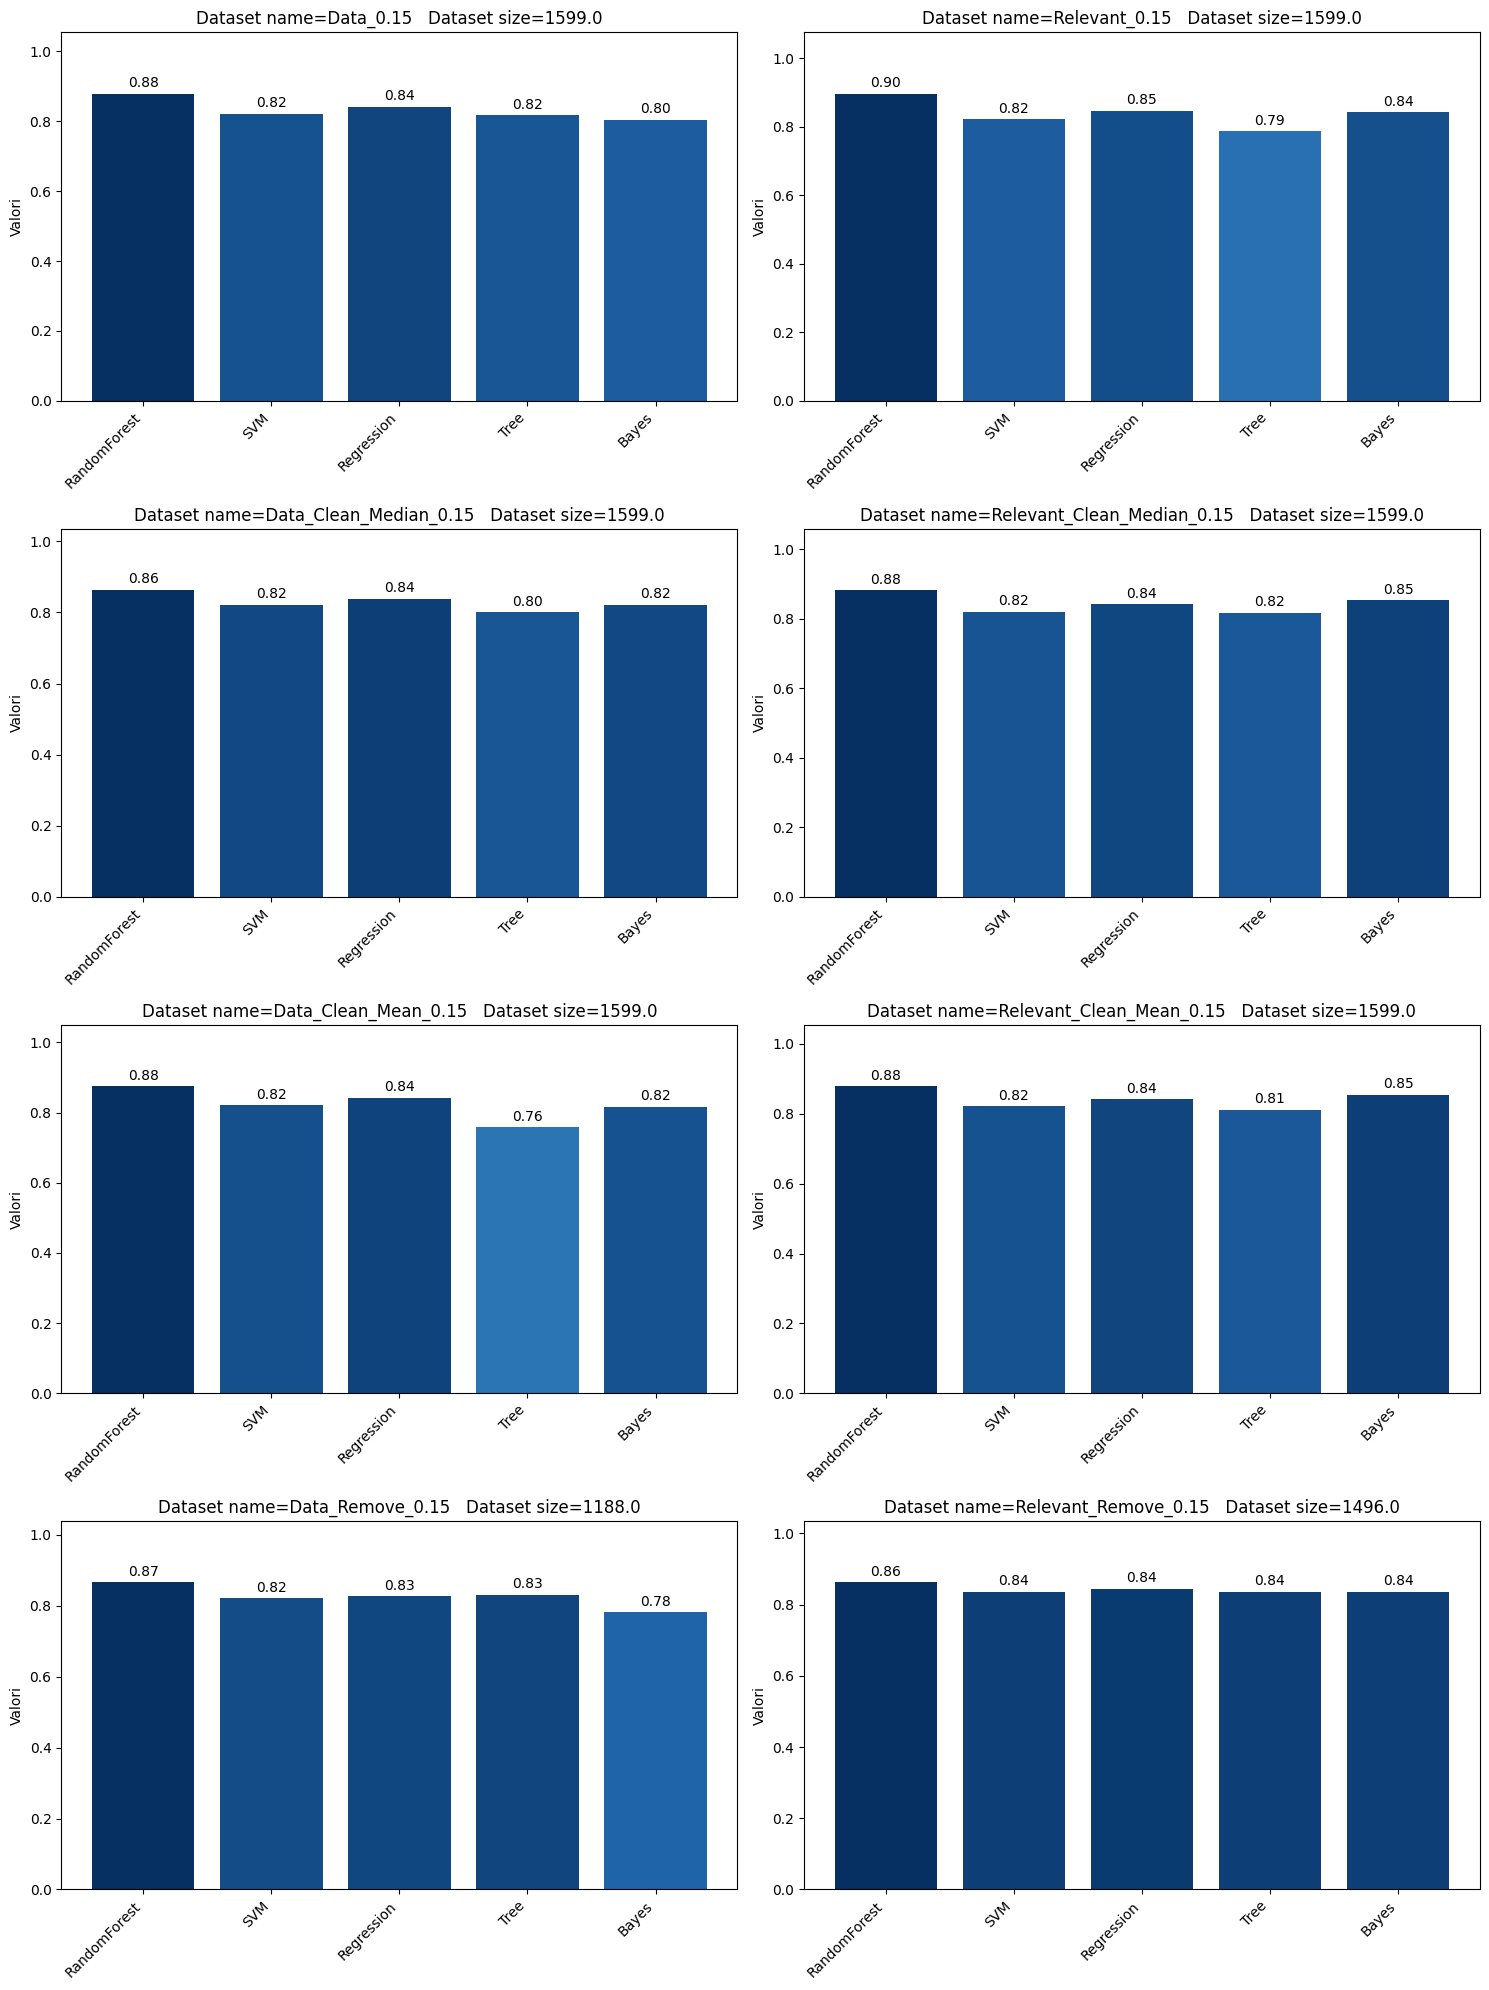

In [188]:
new_result['n_15']=classification_evo(new_data,0.15)
plot_result_evo(new_result['n_15'])

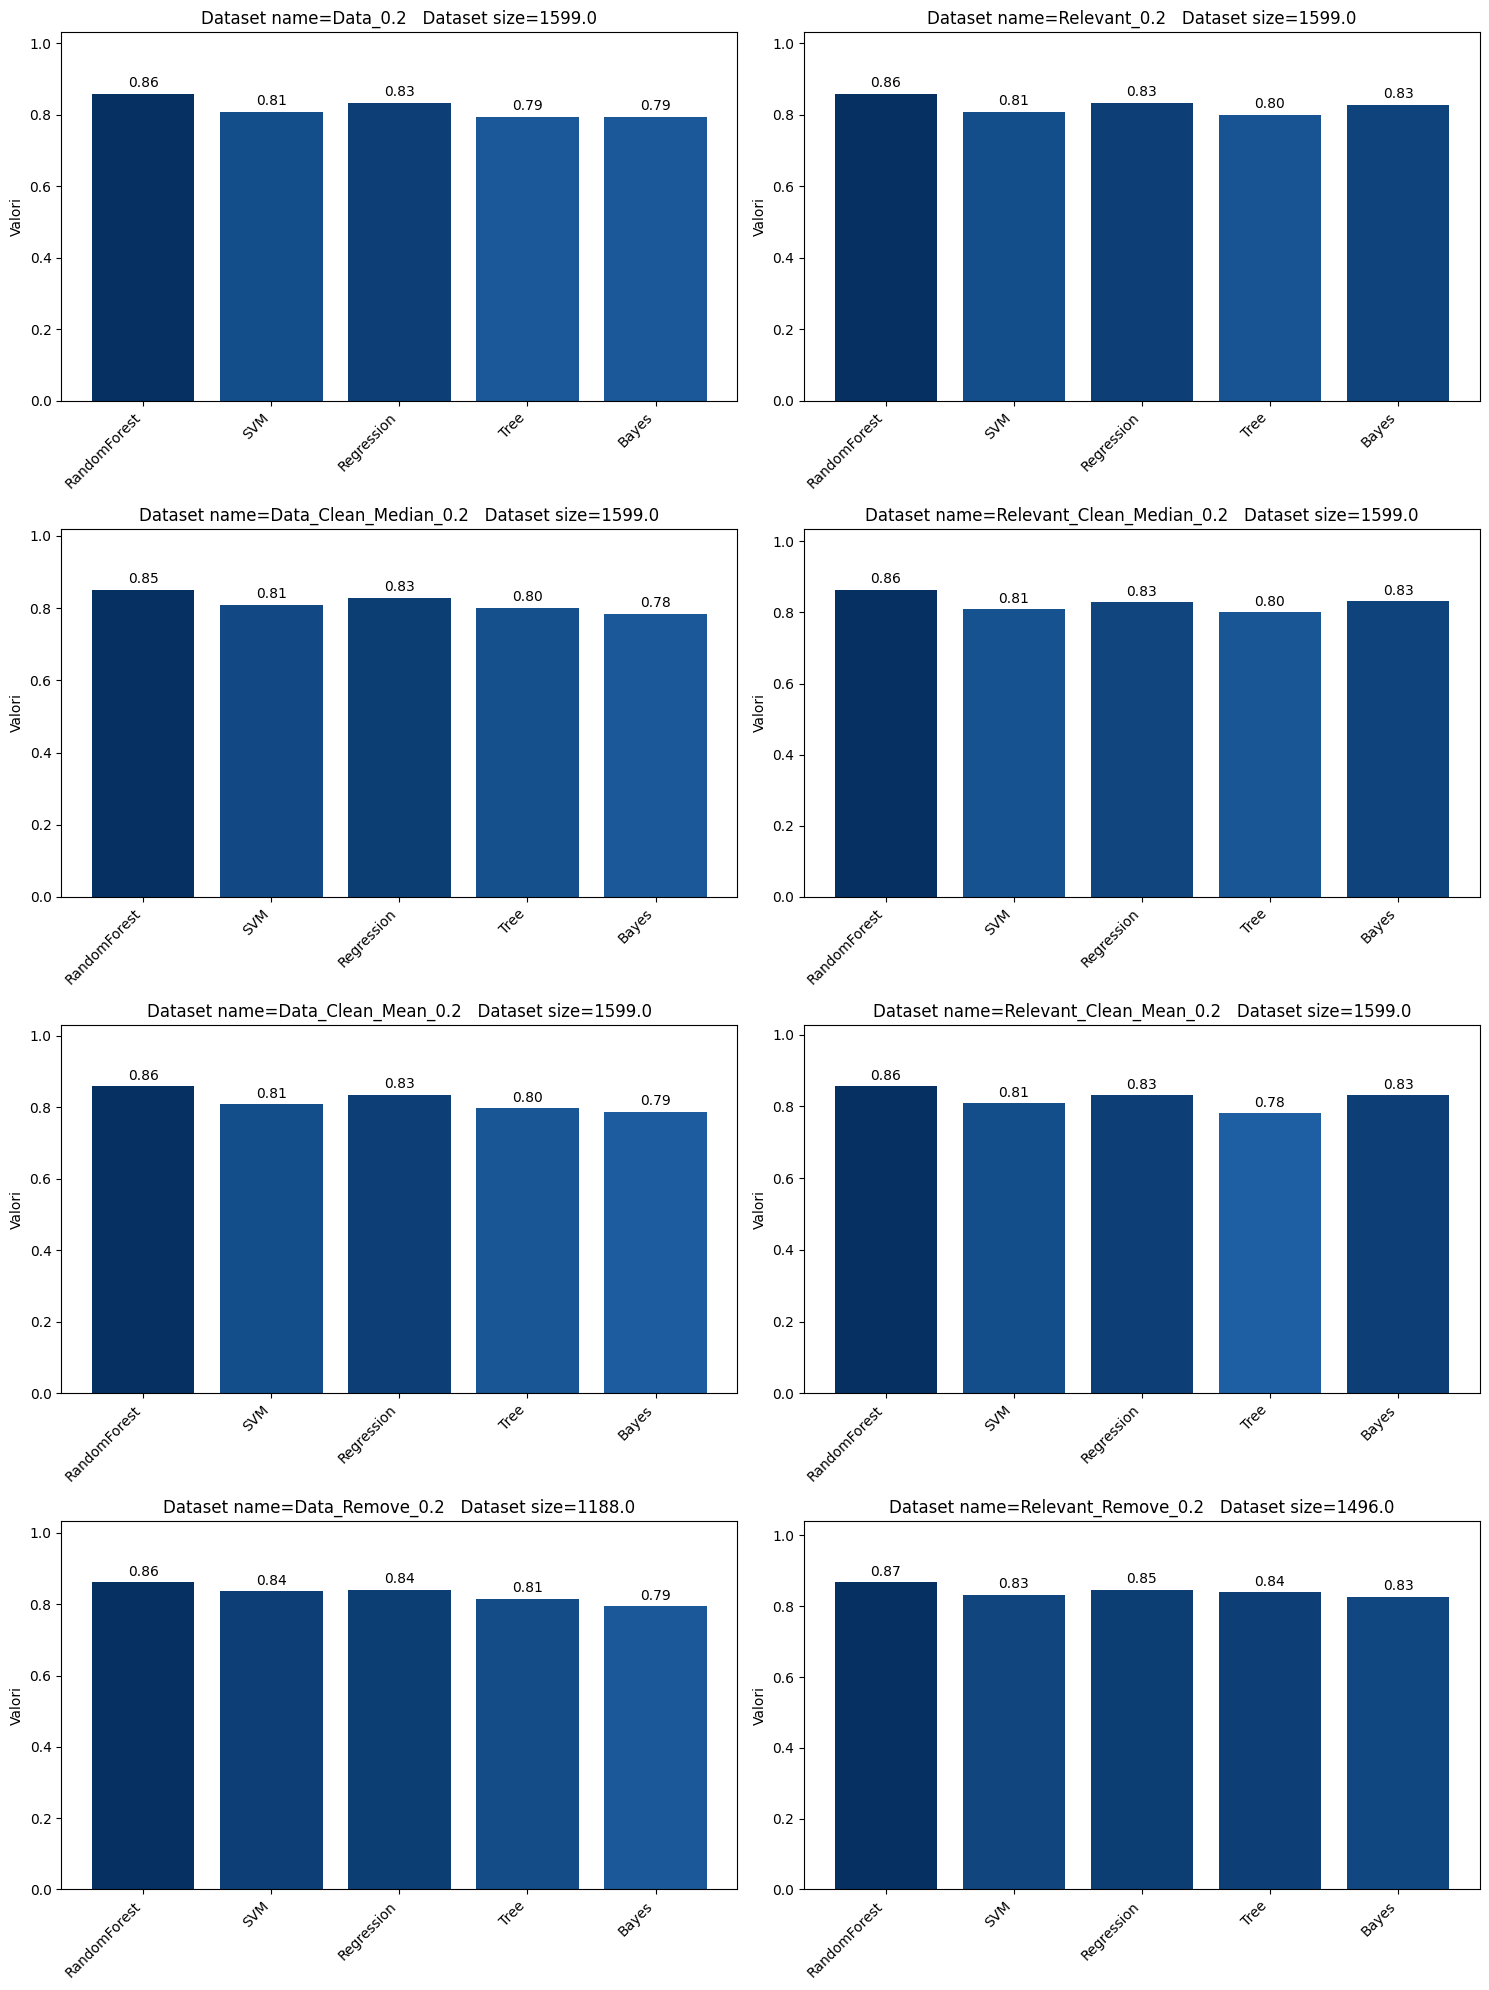

In [189]:
new_result['n_20']=classification_evo(new_data,0.20)
plot_result_evo(new_result['n_20'])

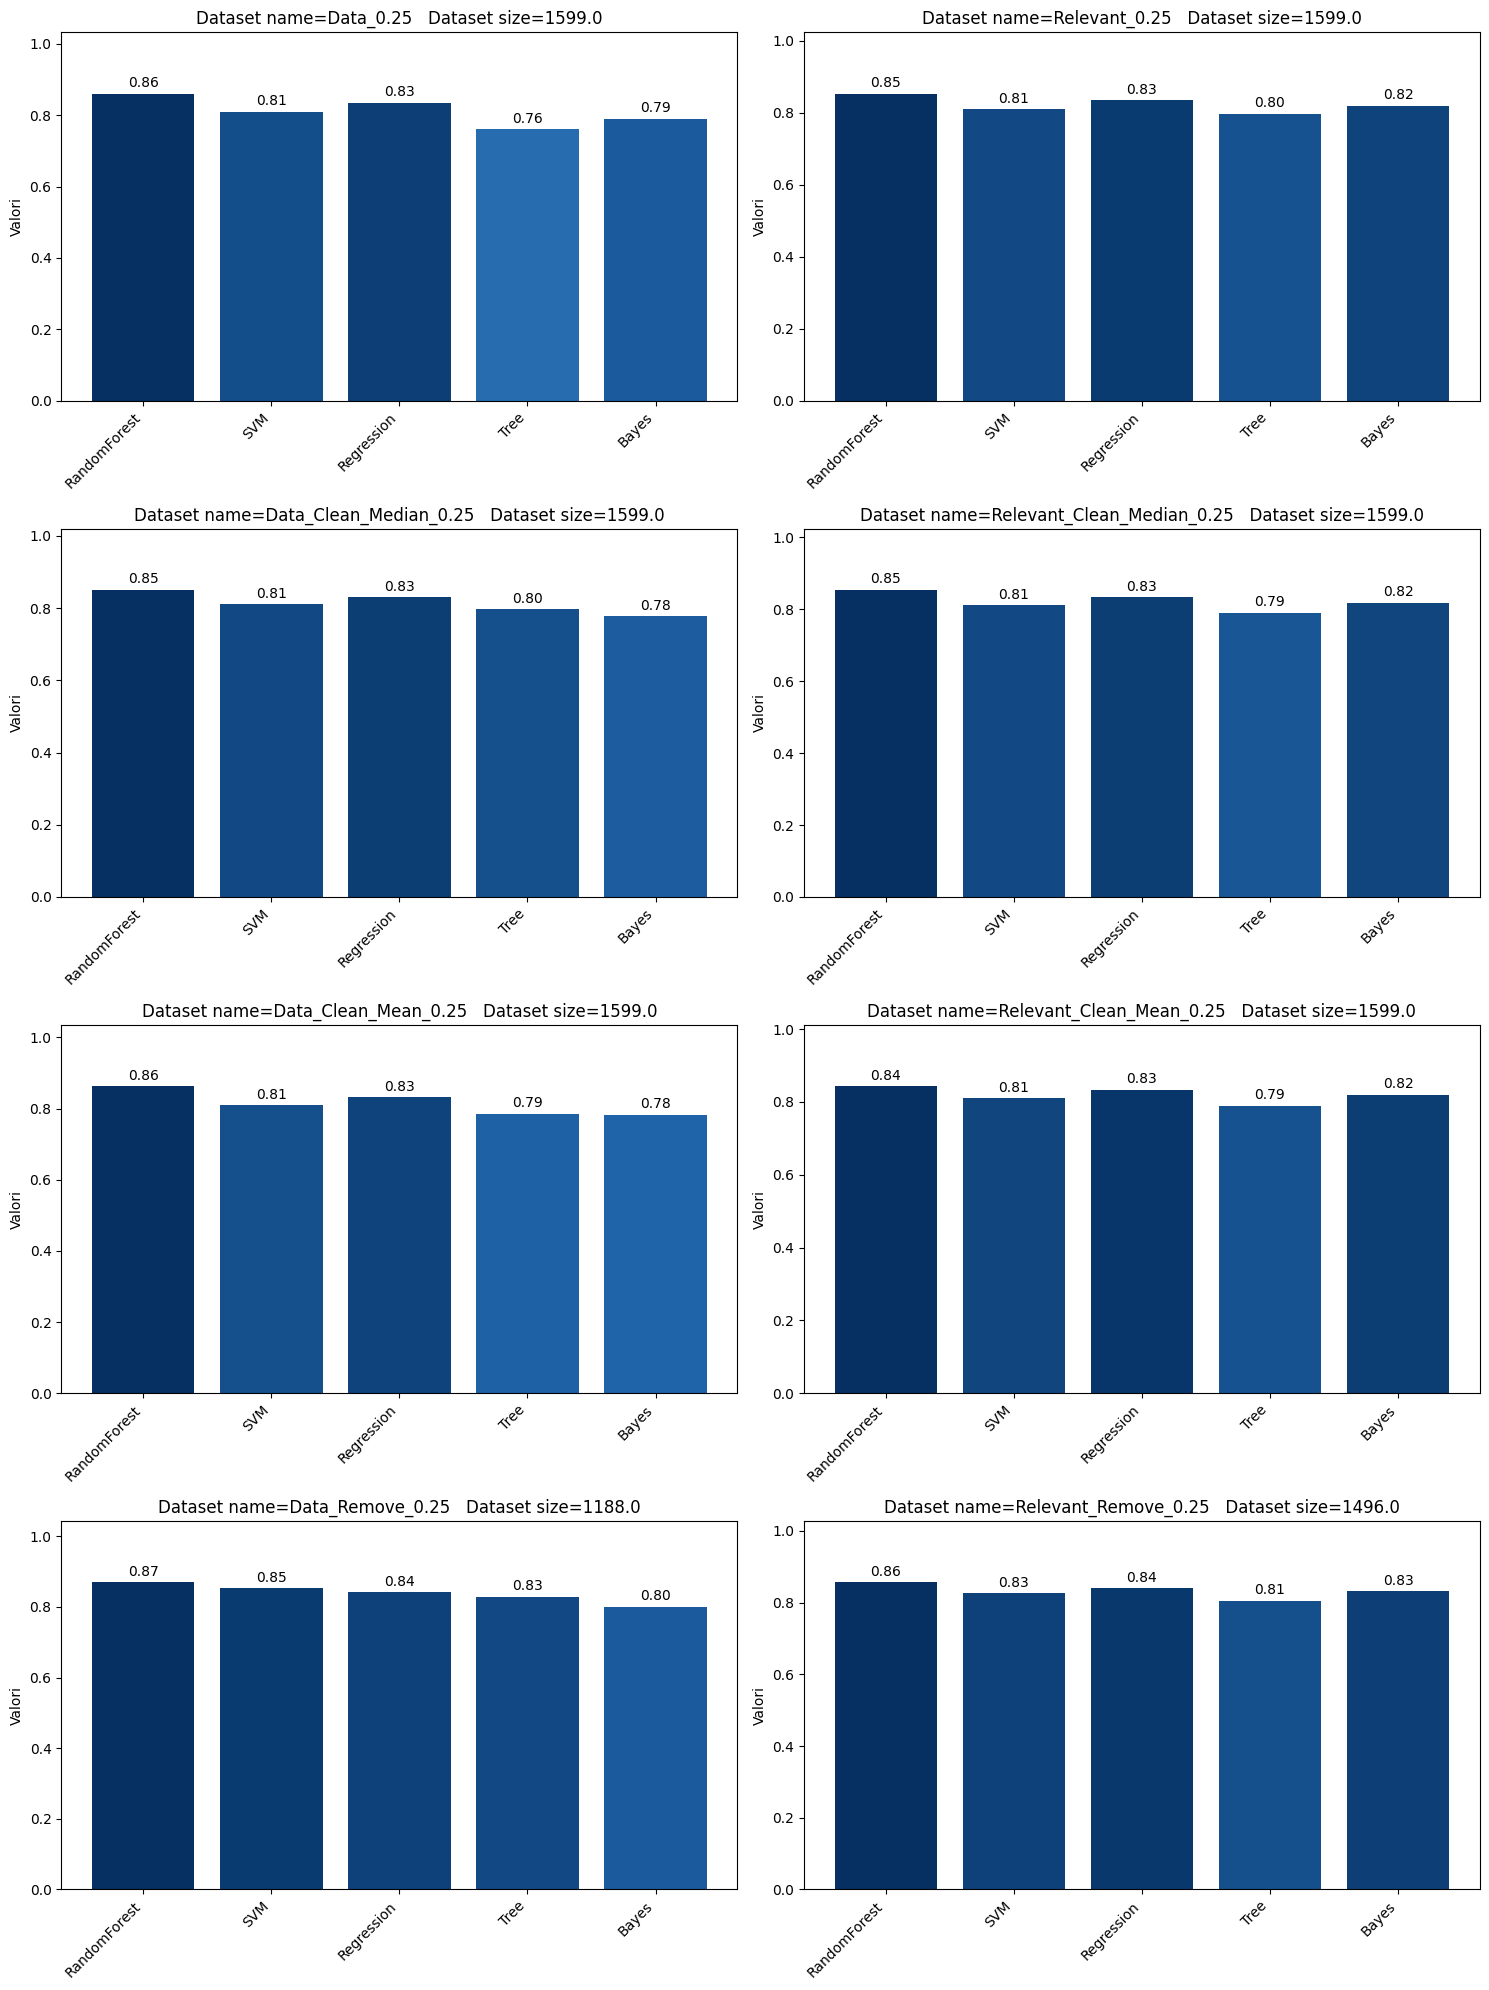

In [190]:
new_result['n_25']=classification_evo(new_data,0.25)
plot_result_evo(new_result['n_25'])

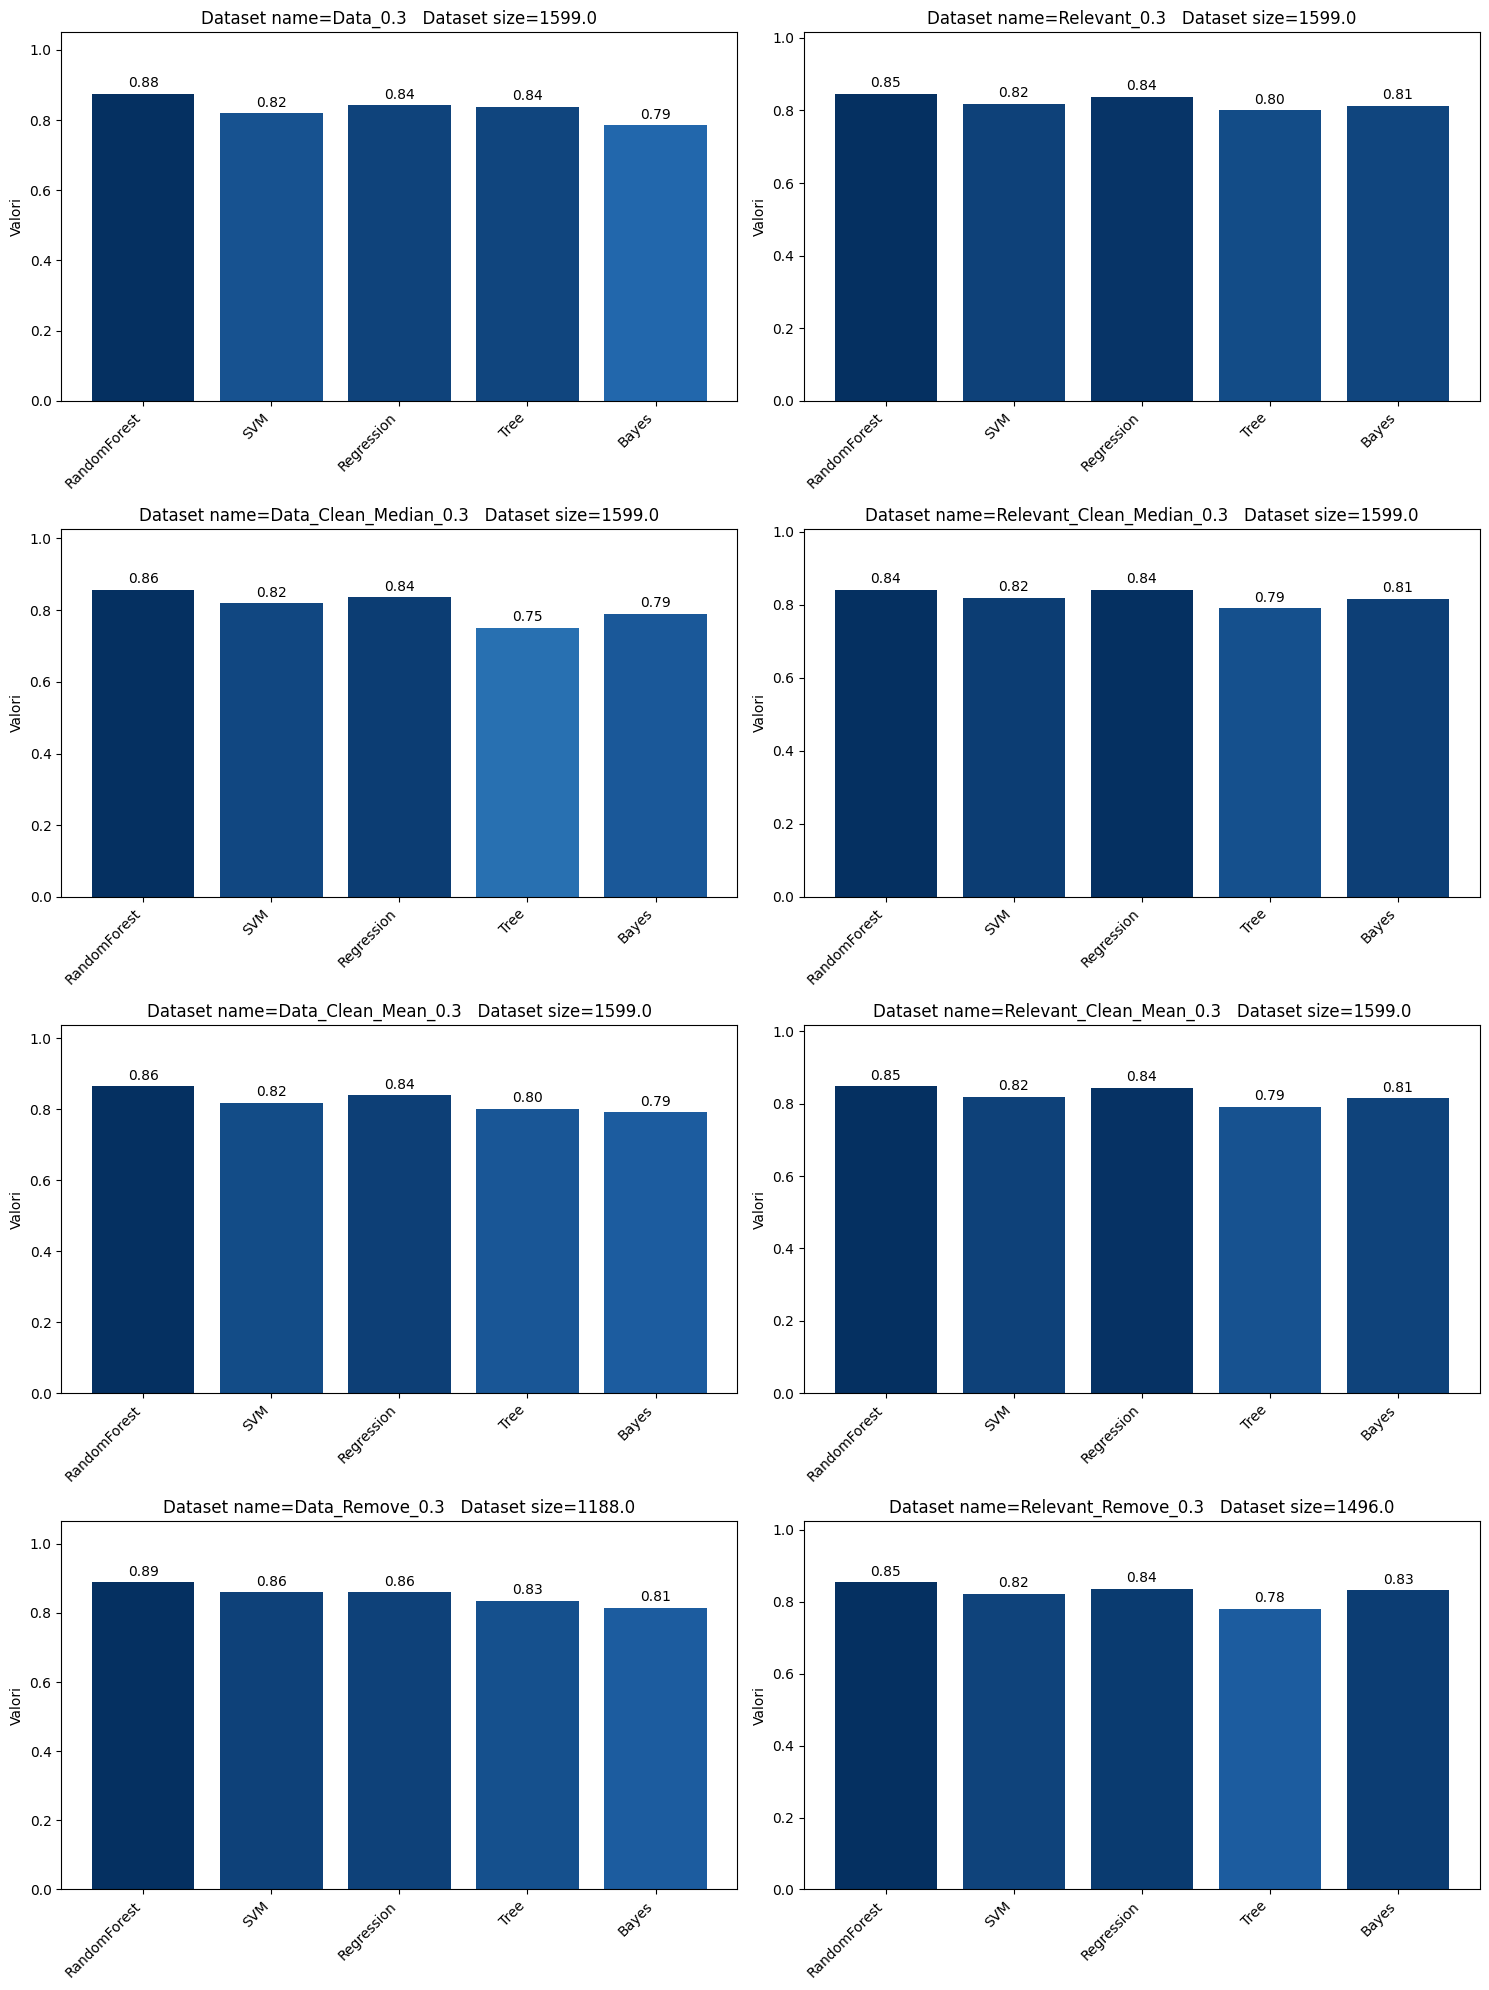

In [191]:
new_result['n_30']=classification_evo(new_data,0.30)
plot_result_evo(new_result['n_30'])

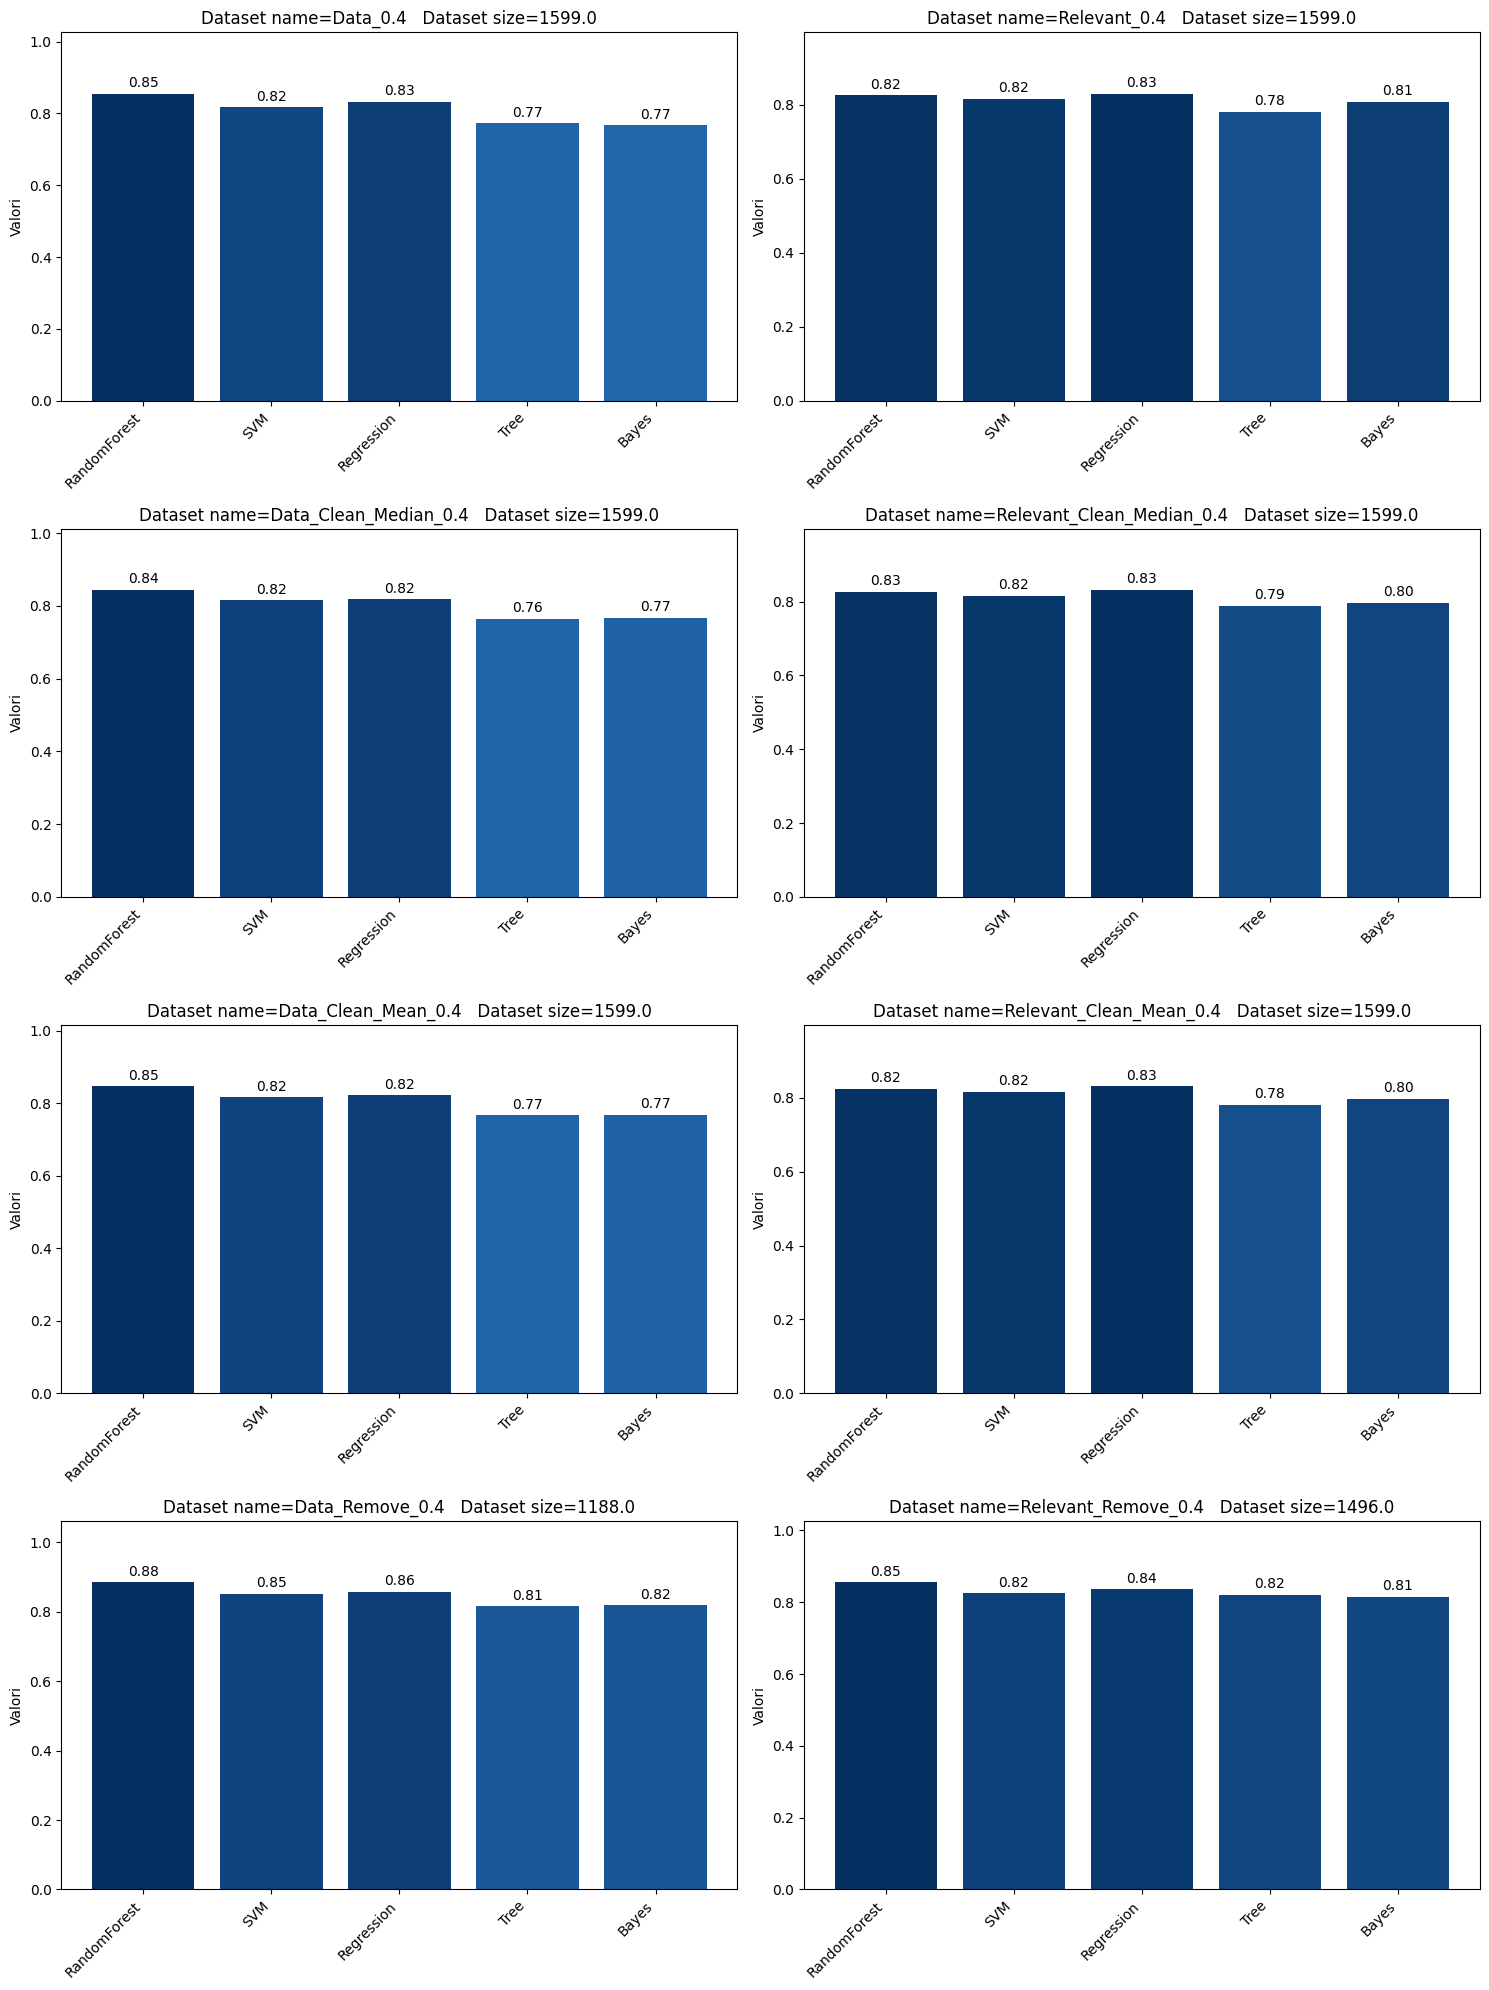

In [192]:
new_result['n_40']=classification_evo(new_data,0.40)
plot_result_evo(new_result['n_40'])

In [193]:
new_merged_df = pd.concat([new_result['n_10'],new_result['n_15'], new_result['n_20'],
                      new_result['n_25'], new_result['n_30'], new_result['n_40']],
                      axis=1)

In [194]:
new_merged_df

,Data_0.1,Relevant_0.1,Data_Clean_Median_0.1,Relevant_Clean_Median_0.1,Data_Clean_Mean_0.1,Relevant_Clean_Mean_0.1,Data_Remove_0.1,Relevant_Remove_0.1,Data_0.15,Relevant_0.15,...,Data_Remove_0.3,Relevant_Remove_0.3,Data_0.4,Relevant_0.4,Data_Clean_Median_0.4,Relevant_Clean_Median_0.4,Data_Clean_Mean_0.4,Relevant_Clean_Mean_0.4,Data_Remove_0.4,Relevant_Remove_0.4
Size,1599.00000,1599.000,1599.000,1599.000,1599.000,1599.000,1188.000000,1496.000,1599.000000,1599.000000,...,1188.000000,1496.000000,1599.000000,1599.000000,1599.00000,1599.00000,1599.000000,1599.00000,1188.000000,1496.000000
RandomForest,0.89400,0.887,0.875,0.869,0.881,0.881,0.866000,0.847,0.879000,0.896000,...,0.888000,0.853000,0.855000,0.825000,0.84400,0.82700,0.847000,0.82500,0.884000,0.855000
SVM,0.82500,0.825,0.825,0.825,0.825,0.825,0.832000,0.807,0.821000,0.821000,...,0.860000,0.822000,0.817000,0.816000,0.81600,0.81600,0.816000,0.81600,0.851000,0.825000
Regression,0.81875,0.825,0.825,0.825,0.825,0.825,0.823529,0.820,0.841667,0.845833,...,0.859944,0.835189,0.832812,0.829688,0.81875,0.83125,0.821875,0.83125,0.857143,0.836394
Tree,0.82500,0.775,0.787,0.800,0.825,0.825,0.815000,0.840,0.817000,0.787000,...,0.835000,0.780000,0.773000,0.780000,0.76400,0.78900,0.767000,0.78100,0.815000,0.821000
Bayes,0.79400,0.825,0.806,0.838,0.806,0.838,0.756000,0.813,0.804000,0.842000,...,0.815000,0.831000,0.767000,0.808000,0.76700,0.79700,0.769000,0.79700,0.819000,0.815000


In [202]:
new_d_1599 = new_merged_df.loc[:, (new_merged_df == 1599).any()]
new_df_1599=new_d_1599.drop(index=['Size'])
new_df_1599

,Data_0.1,Relevant_0.1,Data_Clean_Median_0.1,Relevant_Clean_Median_0.1,Data_Clean_Mean_0.1,Relevant_Clean_Mean_0.1,Data_0.15,Relevant_0.15,Data_Clean_Median_0.15,Relevant_Clean_Median_0.15,...,Data_Clean_Median_0.3,Relevant_Clean_Median_0.3,Data_Clean_Mean_0.3,Relevant_Clean_Mean_0.3,Data_0.4,Relevant_0.4,Data_Clean_Median_0.4,Relevant_Clean_Median_0.4,Data_Clean_Mean_0.4,Relevant_Clean_Mean_0.4
RandomForest,0.89400,0.887,0.875,0.869,0.881,0.881,0.879000,0.896000,0.8630,0.883000,...,0.856000,0.840000,0.865000,0.84800,0.855000,0.825000,0.84400,0.82700,0.847000,0.82500
SVM,0.82500,0.825,0.825,0.825,0.825,0.825,0.821000,0.821000,0.8210,0.821000,...,0.819000,0.819000,0.819000,0.81900,0.817000,0.816000,0.81600,0.81600,0.816000,0.81600
Regression,0.81875,0.825,0.825,0.825,0.825,0.825,0.841667,0.845833,0.8375,0.841667,...,0.835417,0.839583,0.839583,0.84375,0.832812,0.829688,0.81875,0.83125,0.821875,0.83125
Tree,0.82500,0.775,0.787,0.800,0.825,0.825,0.817000,0.787000,0.8000,0.817000,...,0.750000,0.790000,0.802000,0.79200,0.773000,0.780000,0.76400,0.78900,0.767000,0.78100
Bayes,0.79400,0.825,0.806,0.838,0.806,0.838,0.804000,0.842000,0.8210,0.854000,...,0.790000,0.815000,0.792000,0.81500,0.767000,0.808000,0.76700,0.79700,0.769000,0.79700


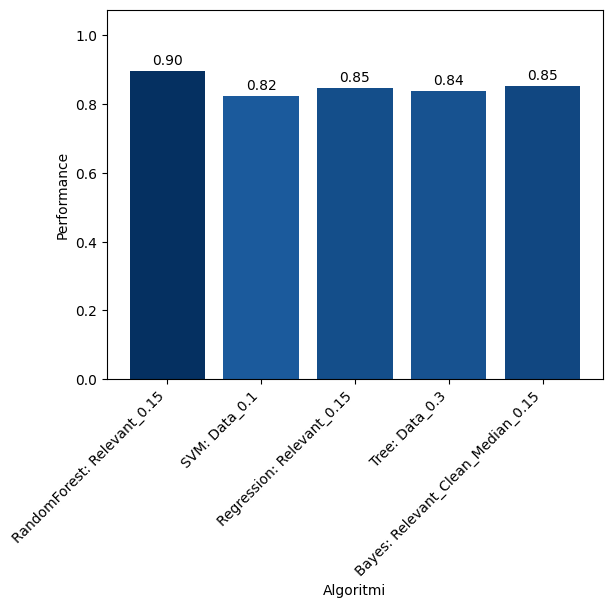

In [205]:
max_new_df_1599=trova_max(new_df_1599)
plot_bar_chart_df_evo(max_new_df_1599)

In [203]:
new_d_1496 = new_merged_df.loc[:, (new_merged_df == 1496).any()]
new_df_1496=new_d_1496.drop(index=['Size'])
new_df_1496

,Relevant_Remove_0.1,Relevant_Remove_0.15,Relevant_Remove_0.2,Relevant_Remove_0.25,Relevant_Remove_0.3,Relevant_Remove_0.4
RandomForest,0.847,0.862000,0.867000,0.856000,0.853000,0.855000
SVM,0.807,0.836000,0.833000,0.826000,0.822000,0.825000
Regression,0.820,0.844444,0.846667,0.839572,0.835189,0.836394
Tree,0.840,0.836000,0.840000,0.805000,0.780000,0.821000
Bayes,0.813,0.836000,0.827000,0.832000,0.831000,0.815000


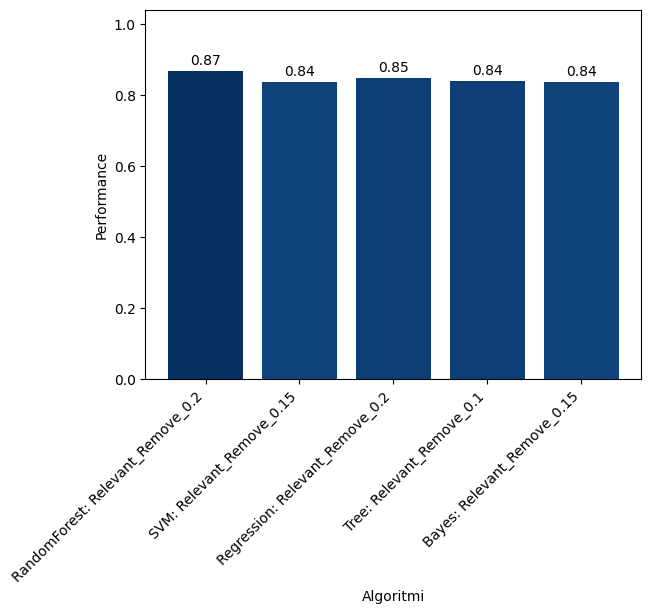

In [204]:
max_new_df_1496=trova_max(new_df_1496)
plot_bar_chart_df_evo(max_new_df_1496)

In [199]:
new_d_1188 = new_merged_df.loc[:, (new_merged_df == 1188).any()]
new_df_1188=new_d_1188.drop(index=['Size'])
new_df_1188

,Data_Remove_0.1,Data_Remove_0.15,Data_Remove_0.2,Data_Remove_0.25,Data_Remove_0.3,Data_Remove_0.4
RandomForest,0.866000,0.866000,0.861000,0.869000,0.888000,0.884000
SVM,0.832000,0.821000,0.836000,0.852000,0.860000,0.851000
Regression,0.823529,0.826816,0.840336,0.841751,0.859944,0.857143
Tree,0.815000,0.832000,0.815000,0.828000,0.835000,0.815000
Bayes,0.756000,0.782000,0.794000,0.801000,0.815000,0.819000


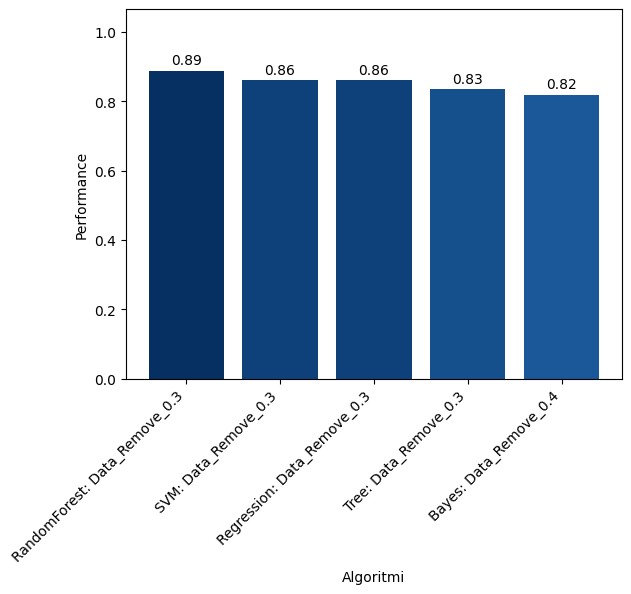

In [200]:
max_new_df_1188=trova_max(new_df_1188)
plot_bar_chart_df_evo(max_new_df_1188)